In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
from time import time as time
t0 = time()
nfiles = 100
ns_per_sample = 25
window_min = 100
window_max = 500
dwindow = 5

In [3]:
runno = '7479'
Ecut = (2000, 15000)
nwindow = int((window_min - window_max) / dwindow)

In [4]:
def gauss(x, A, m, s):
    return A*np.exp(-(x-m)**2 / (2*s**2))

def gauss2(x, A, m, v): 
    if v <= 0:
        return 1e10
    return A*np.exp(-(x-m)**2 / (2*v))

def offset_gauss(x, A, m, v, C):
    return C + A*np.exp(-(x-m)**2 / (2*v))

def const(x, a):
    return a + 0*x

from scipy.optimize import curve_fit

def exp_dt(sig):
    """
    expected drift distance  as a function of sigma of the S2 signal (Zrms from kdst 2018 version)
    parameters from the ad-hoc fit
    """
    p = [-10.00667732,  52.1855012,   12.68195726,  58.66322846, -20.11819297]
    dt = p[0] * sig**4 + p[1] * sig**3 + p[2]*sig**2 + p[3]*sig + p[4]
    return dt

In [5]:
jsondir = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_'+runno+'_json_updated_20201202/'

if nfiles > 0:
    all_jsons = [jsondir+file for file in os.listdir(jsondir)][:nfiles]
else:
    all_jsons = [jsondir+file for file in os.listdir(jsondir)]

In [6]:
all_jsons[0]

'/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_7479_json_updated_20201202/irene_test_out_0000.json'

In [7]:
all_data = {
    'events_window_maxX' : [],
    'events_window_maxY' : [],
    'events_window_rms' : [],
    'events_window_width' : [],
    'events_window_energy' : [],
    'events_window_charge' : [],
    'events_window_Zrms' : [],
    'events_window_Zgauss' : [],
    'events_window_Wrms' : [],
    'events_window_Wgauss' : [],
    'events_window_GaussOffset' : [],
    'events_prewindow_sums' : [],
    'events_sumwf' : [],
    'events_times' : [],
    'event_numbers' : [],
    'events_window_r2' : []
}

n = 0
for filename in all_jsons:
    if n % 10 == 0:
        remaining = (len(all_jsons) - n)*(time() - t0) / (n + 1)
        print(n, '...', round(time() - t0, 1), '; Remaining ~=', round(remaining,1))
    n += 1
    f = open(filename)
    new_dict = json.load(f)
    f.close()
    for k in new_dict.keys():
        all_data[k].extend(new_dict[k])
print('DONE')

0 ... 1.4 ; Remaining ~= 140.9
10 ... 4.4 ; Remaining ~= 35.7
20 ... 7.5 ; Remaining ~= 28.5
30 ... 10.5 ; Remaining ~= 23.7
40 ... 13.8 ; Remaining ~= 20.3
50 ... 16.7 ; Remaining ~= 16.3
60 ... 20.4 ; Remaining ~= 13.4
70 ... 23.4 ; Remaining ~= 9.9
80 ... 26.7 ; Remaining ~= 6.6
90 ... 30.0 ; Remaining ~= 3.3
DONE


In [8]:
events_window_maxX = np.array(all_data['events_window_maxX'])
events_window_maxY = np.array(all_data['events_window_maxY'])
events_window_rms = np.array(all_data['events_window_rms'])
events_window_width = np.array(all_data['events_window_maxX'])
events_window_energy = np.array(all_data['events_window_energy'])
events_window_charge = np.array(all_data['events_window_charge'])
events_window_Zrms = np.array(all_data['events_window_Zrms'])
events_window_Zgauss = np.array(all_data['events_window_Zgauss'])
events_sumwf = np.array(all_data['events_sumwf'])
events_times = np.array(all_data['events_times'])
events_window_Wrms = np.array(all_data['events_window_Wrms'])
events_window_Wgauss = np.array(all_data['events_window_Wgauss'])
events_window_r2 = np.array(all_data['events_window_r2'])
events_window_GaussOffset = np.array(all_data['events_window_GaussOffset'])
events_prewindow_sums = np.array(all_data['events_prewindow_sums'])

In [9]:
print(len(events_window_maxX))
print(len(events_window_maxY))
print(len(events_window_rms))
print(len(events_window_width))
print(len(events_window_energy))
print(len(events_window_charge))
print(len(events_window_Zrms))
print(len(events_sumwf))
print(len(events_times))
print(len(events_window_Wrms))
print(len(events_window_Wgauss))
print(len(events_window_GaussOffset))
print(len(events_prewindow_sums))

print('-------------')
print(len(events_window_maxX[0]))
print(len(events_window_maxY[0]))
print(len(events_window_rms[0]))
print(len(events_window_width[0]))
print(len(events_window_energy[0]))
print(len(events_window_charge[0]))
print(len(events_window_Zrms[0]))
print(len(events_sumwf[0]))
print(len(events_times[0]))

33895
33895
33895
33895
33895
33895
33895
33895
33895
33895
33895
33895
33895
-------------
80
80
80
80
80
80
80
26
26


In [10]:
last_GaussOffset = np.array([ window_GaussOffset[-1] for window_GaussOffset in events_window_GaussOffset ])

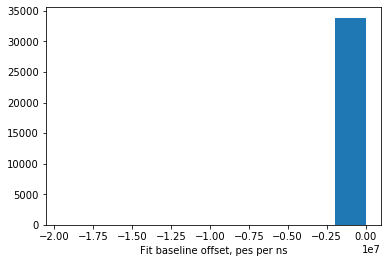

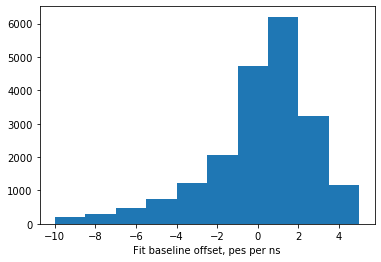

In [11]:
plt.hist(last_GaussOffset)
plt.xlabel('Fit baseline offset, pes per ns')
plt.show()

plt.hist(last_GaussOffset, range=(-10, 5))
plt.xlabel('Fit baseline offset, pes per ns')
plt.show()

In [12]:
max(events_prewindow_sums)

193119.00070834308

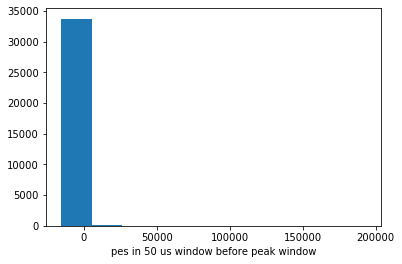

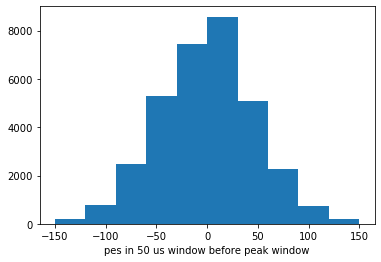

In [13]:
plt.hist(events_prewindow_sums)
plt.xlabel('pes in 50 us window before peak window')
plt.show()

plt.hist(events_prewindow_sums, range=(-150,150))
plt.xlabel('pes in 50 us window before peak window')
plt.show()

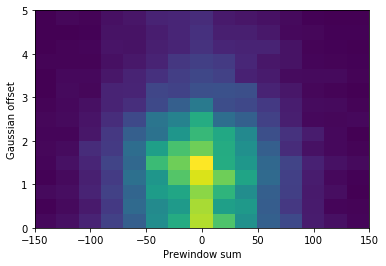

In [14]:
GoodFits = (last_GaussOffset > -1) & (last_GaussOffset < 10)
plt.hist2d(events_prewindow_sums[GoodFits], last_GaussOffset[GoodFits], bins = 15, range = ((-150, 150),(0, 5)))
plt.xlabel('Prewindow sum')
plt.xlim(-150, 150)
plt.ylabel('Gaussian offset')
plt.show()

In [15]:
events_energy = np.array([ events_window_energy[e][-1] for e in range(len(events_window_energy)) ])
events_energy_subtracted = events_energy - events_prewindow_sums
events_window_cut_samples = np.arange(window_min, window_max, dwindow)
events_window_cut = events_window_cut_samples * ns_per_sample * 2
events_window_energy_norm = np.array([ [ peak / max(max(window_energy), 0.1) for peak in window_energy ] for window_energy in events_window_energy ])
events_peaks = np.array([ max(wf) for wf in events_sumwf ])
Emask = (events_energy > Ecut[0]) & (events_energy < Ecut[1])

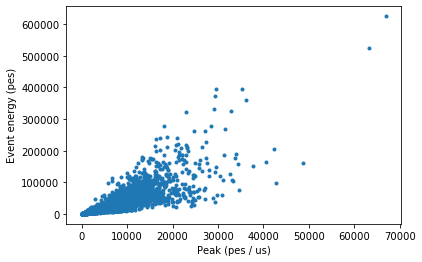

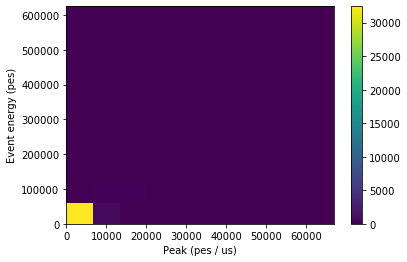

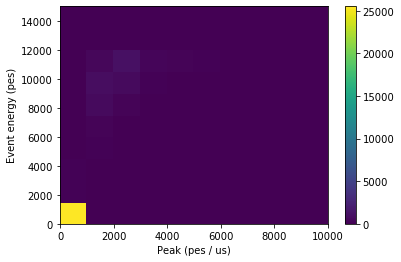

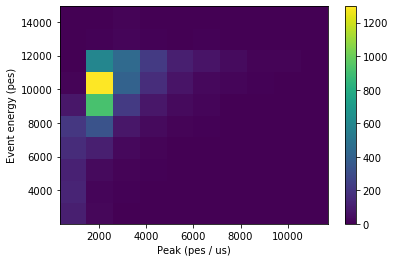

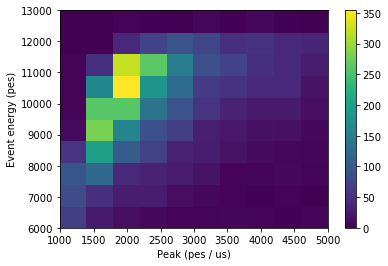

In [16]:
plt.plot(events_peaks, events_energy, '.')
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.show()

h = plt.hist2d(events_peaks, events_energy)
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks, events_energy, range = ((0,10000),(0, Ecut[1])) )
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks[Emask], events_energy[Emask])
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks, events_energy, range = ((1000,5000),(6000, 13000)) )
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

Zgauss = 305.7699063978814
Energy = 4835.684364869376


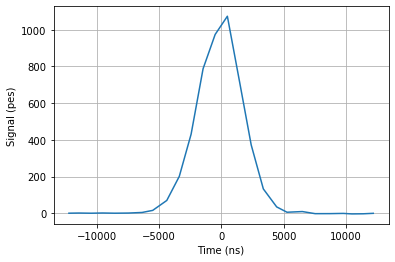

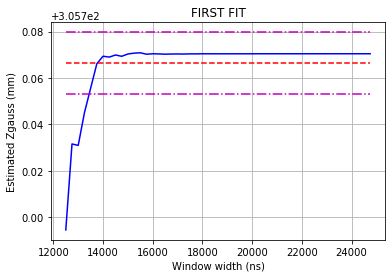

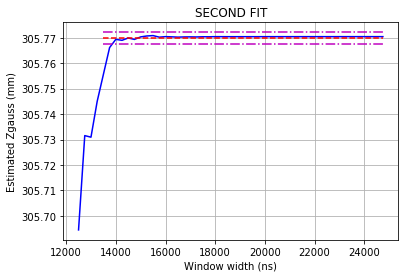

Zgauss = 534.1575610269314
Energy = 9169.804876118167


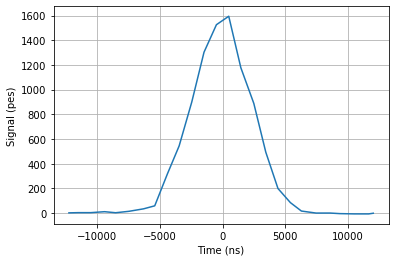

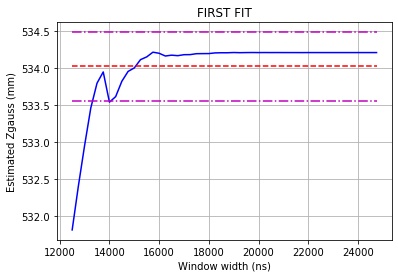

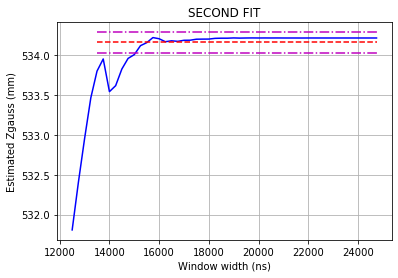

Zgauss = 409.6420675690867
Energy = 8439.294384255873


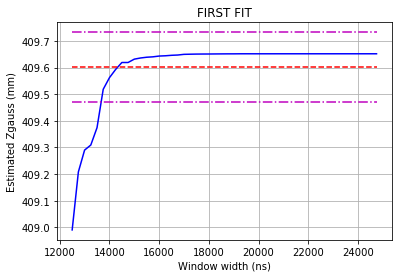

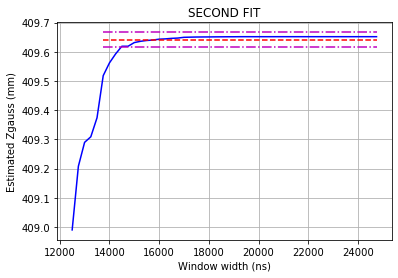

Zgauss = 557.8568060351015
Energy = 7360.169016025853


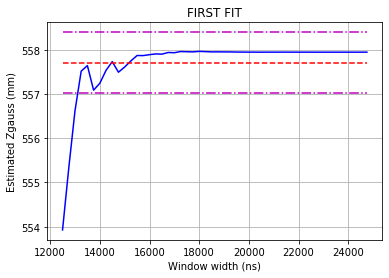

Zgauss = 507.37670910633557
Energy = 10822.962959900467


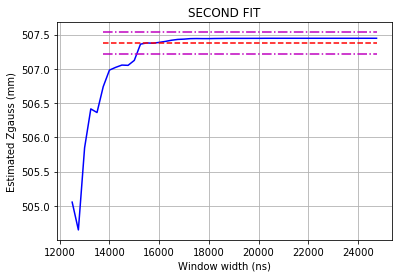

Zgauss = -20.118192786781663
Energy = 11288.142143809677


Zgauss = 137.80899516329873
Energy = 11377.05799986643


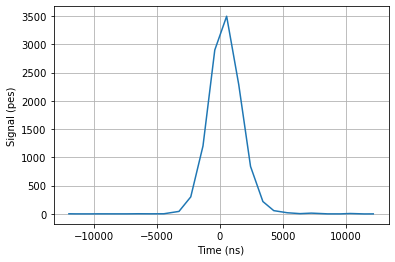

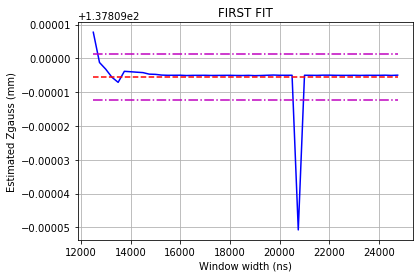

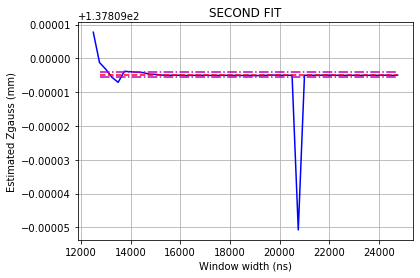

Zgauss = -20.118192784631603
Energy = 8805.160338642023


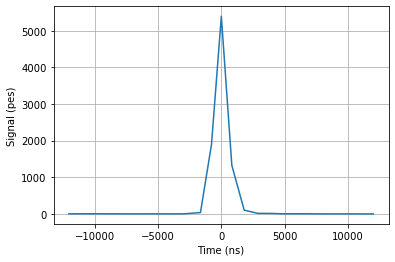

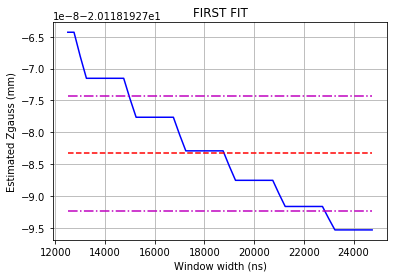

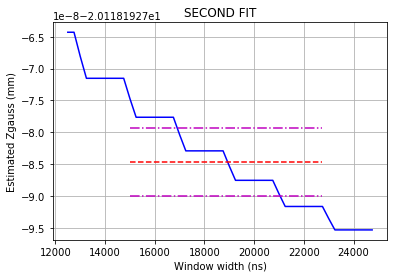

Zgauss = 458.0236576071576
Energy = 7619.120842821707


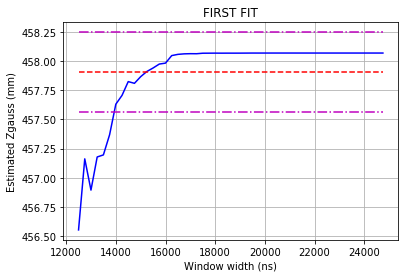

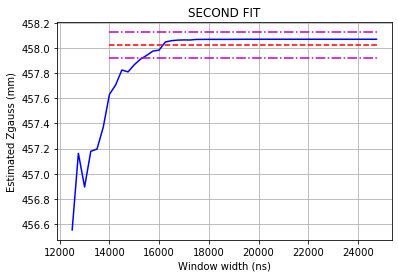

Zgauss = 592.747942140545
Energy = 10792.337130439828


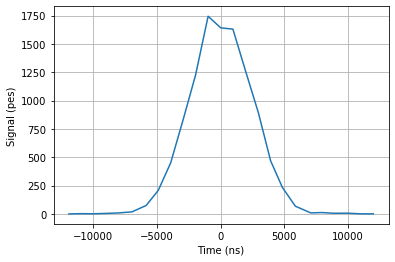

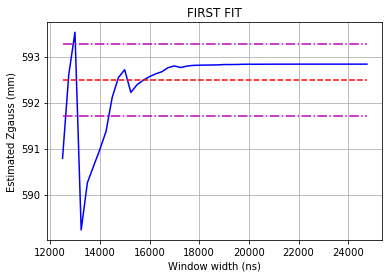

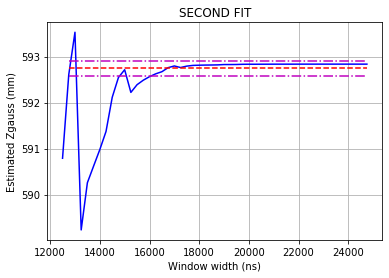

Zgauss = 398.6512156080987
Energy = 11310.543411849734


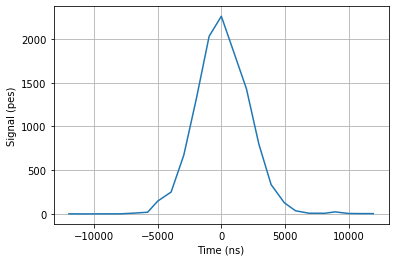

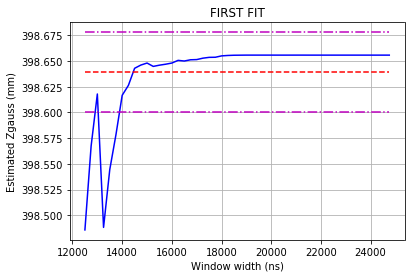

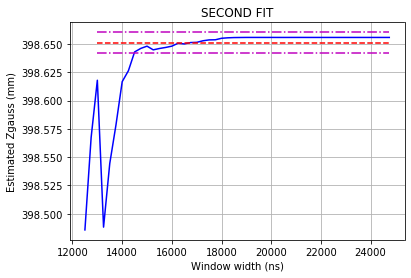

Zgauss = 61.21085166891918
Energy = 11379.447394712892


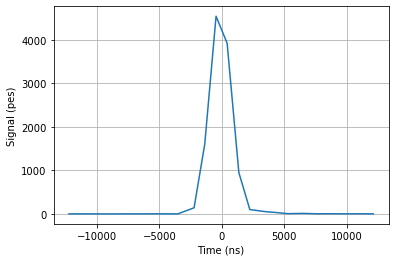

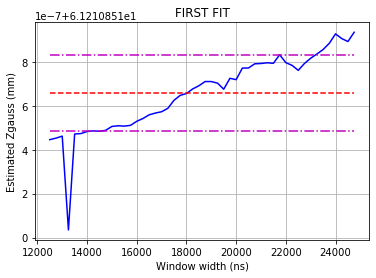

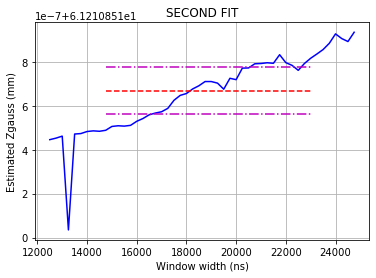

Zgauss = 368.14015233247585
Energy = 10108.86030618341


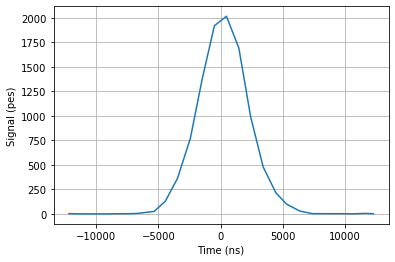

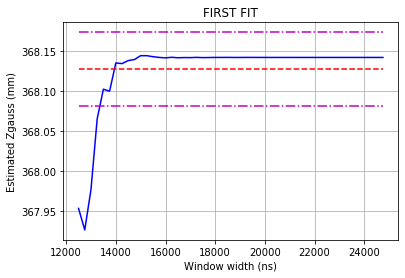

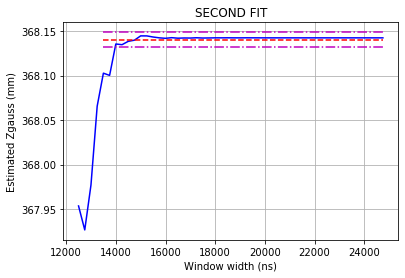

Zgauss = 78.88108907967536
Energy = 10979.1784905629


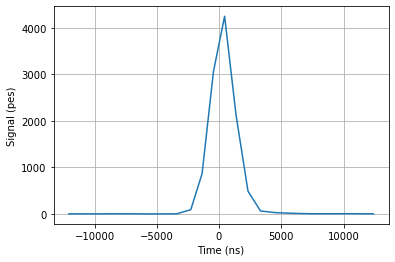

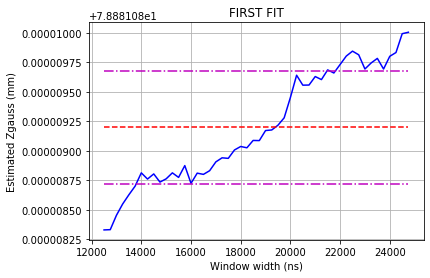

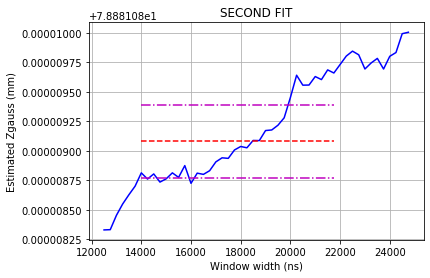

Zgauss = 523.696238088805
Energy = 10963.265497518918


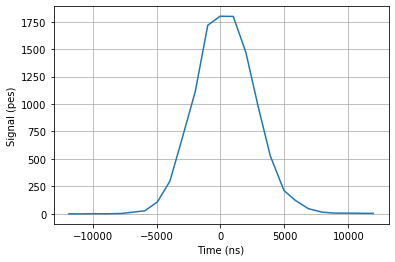

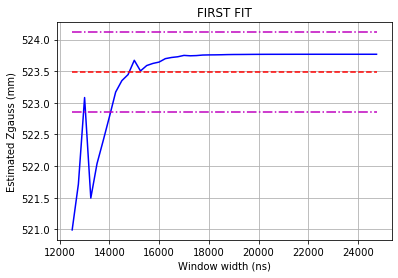

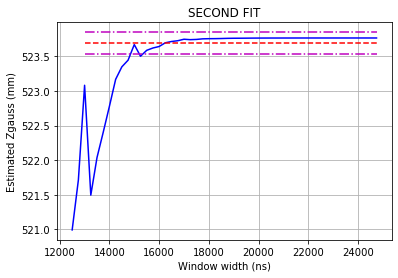

Zgauss = 110.49561704518896
Energy = 10941.66537568599


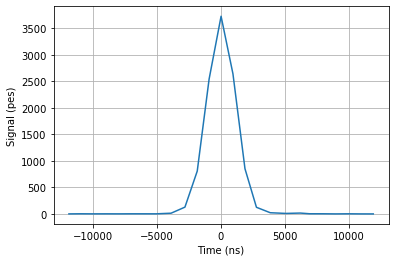

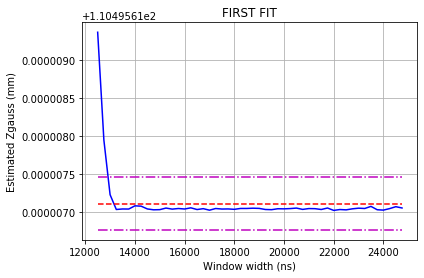

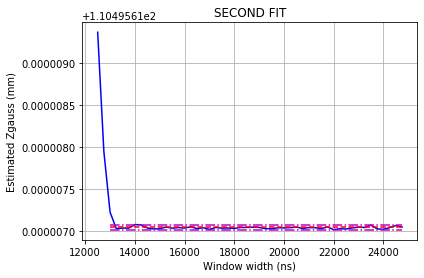

Zgauss = 160.85671601784182
Energy = 11367.594900866638


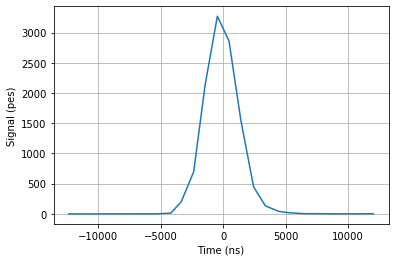

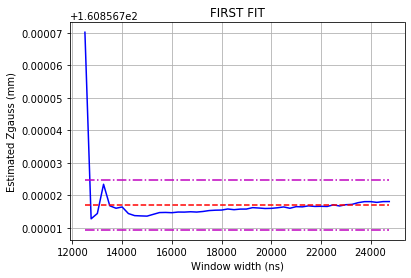

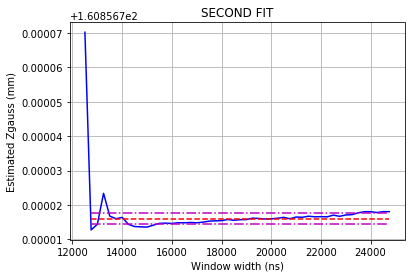

Zgauss = 215.2879045416527
Energy = 11041.940577698806


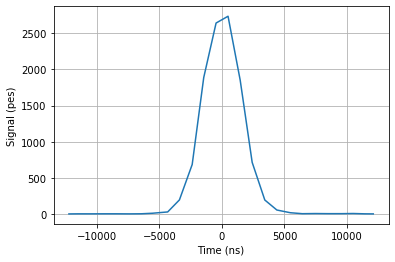

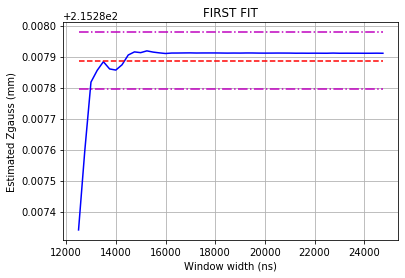

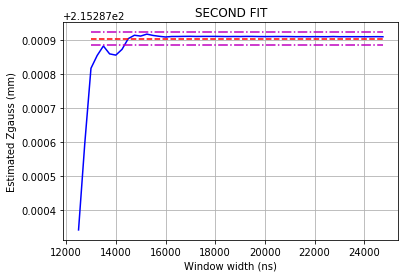

Zgauss = 490.7149929767882
Energy = 8303.434056645776


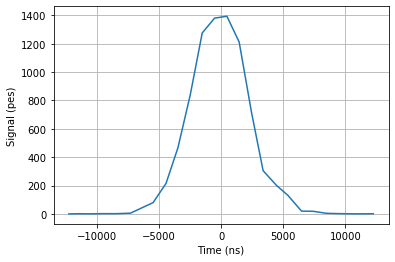

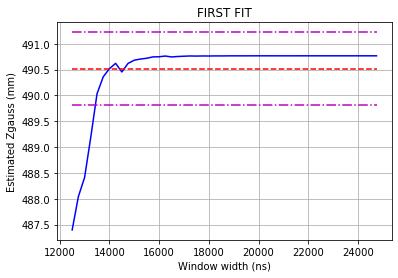

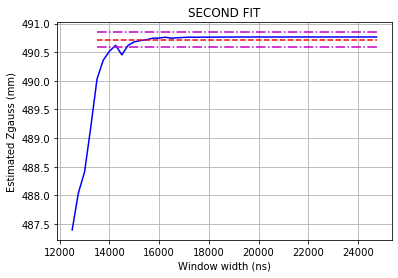

Zgauss = 7.897245933887256
Energy = 10304.143207914209


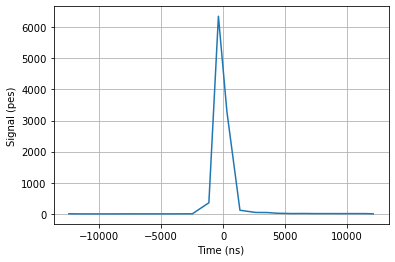

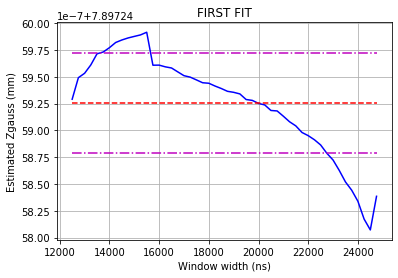

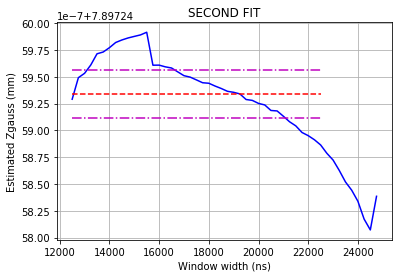

Nasty events:  []


In [17]:
# Get the Zgauss values by finding the flat line in the Zgauss vs window
all_Zgauss = []
nasty_events = []

maxshow = 20
shown = 0
for ievt in range(len(events_window_Zgauss)):    
    
    step = 0
    nasty = False
    
    try:

        # First iteration of fit
        long_window_cut = events_window_cut > events_window_cut[-1] / 2
        xdata = events_window_cut[long_window_cut]
        ydata = events_window_Zgauss[ievt][long_window_cut]
        popt, pcov = curve_fit(const, xdata, ydata, p0 = np.mean(ydata))

        step = 1
        fitdata = const(xdata, *popt)
        stdev = np.std(ydata)
        errors = (fitdata - stdev, fitdata + stdev)

        stdev_mask = (ydata > errors[0]) & (ydata < errors[1])

        # Second iteration of fit, without outliers
        step = 2
        xdata2 = xdata[stdev_mask]
        ydata2 = ydata[stdev_mask]
        popt, pcov = curve_fit(const, xdata2, ydata2, p0 = np.mean(ydata))

        step = 3
        fitdata2 = const(xdata2, *popt)
        stdev2 = np.std(ydata2)
        errors2 = (fitdata2 - stdev2, fitdata2 + stdev2)

        step = 4
        Zgauss = popt[0]
        all_Zgauss.append(Zgauss)
                
        if shown < maxshow and Emask[ievt]:
            shown += 1

            print('Zgauss =', Zgauss)
            print('Energy =', events_energy[ievt])
            
            step = 5
            # Plot the waveform
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
            plt.grid(True)
            plt.show()

            step = 6
            # Plot the first fit curve
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata, fitdata, '--', color='r')
            plt.plot(xdata, errors[0], '-.', color='m')
            plt.plot(xdata, errors[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zgauss (mm)')
            plt.title('FIRST FIT')
            plt.grid(True)
            plt.show()

            step = 7
            # Plot the second fit curve
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata2, fitdata2, '--', color='r')
            plt.plot(xdata2, errors2[0], '-.', color='m')
            plt.plot(xdata2, errors2[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zgauss (mm)')
            plt.title('SECOND FIT')
            plt.grid(True)
            plt.show()

    except:
        
        Zgauss = 0
        all_Zgauss.append(Zgauss)
        nasty = True
        
        if Emask[ievt] and shown < maxshow:
            shown += 1
            print('You might have an issue with event', ievt, ': it is big, but cannot fit a Z value.')
            nasty_events.append(ievt)
            print('Failed on step', step)
            
            # Plot the waveform
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
            plt.grid(True)
            plt.show()
            
            long_window_cut = events_window_cut > events_window_cut[-1] / 2
            xdata = events_window_cut[long_window_cut]
            ydata = events_window_Zgauss[ievt][long_window_cut]

            # Plot the first fit curve
            plt.plot(xdata, ydata, color='b')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zgauss (mm)')
            plt.grid(True)
            plt.show()

    
all_Zgauss = np.array(all_Zgauss)
print('Nasty events: ', nasty_events)

Wgauss = 4711.511481508267
Energy = 3304.6542566275834
iEvt   = 5209


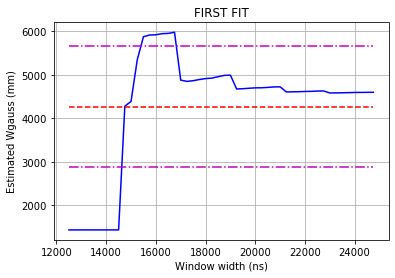

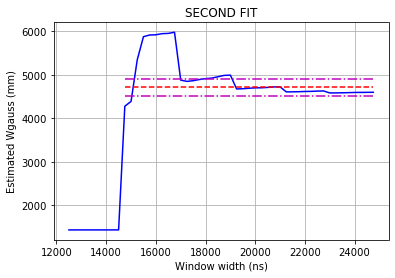

Wgauss = 4035.448669282815
Energy = 10251.947097202621
iEvt   = 12136


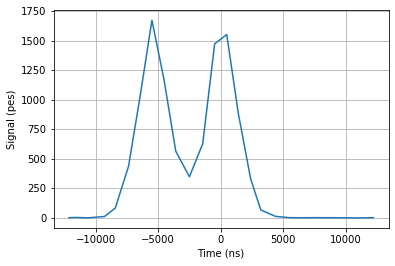

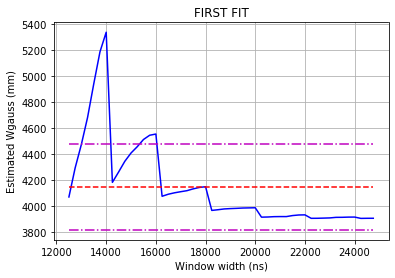

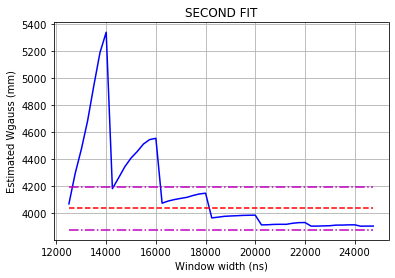

Wgauss = 5423.10261742061
Energy = 2863.1063537978566
iEvt   = 20762


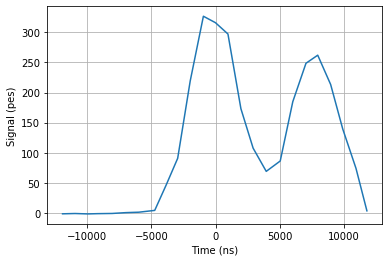

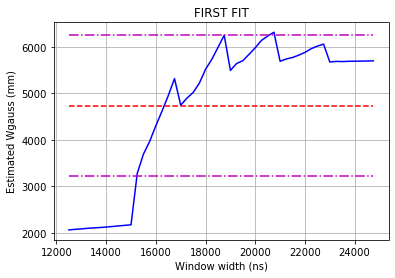

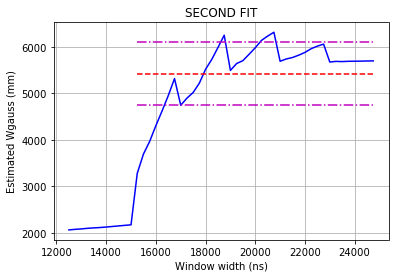

Wgauss = 4470.5006195002
Energy = 12333.968340777436
iEvt   = 28816


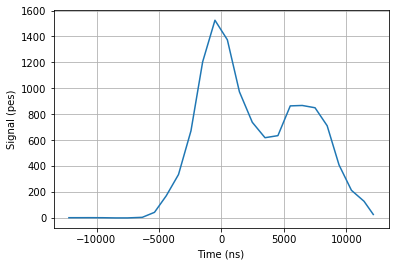

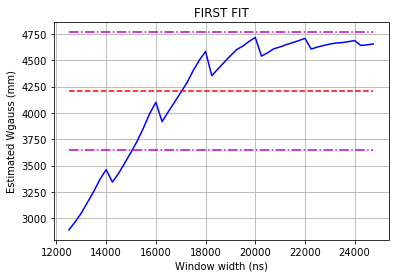

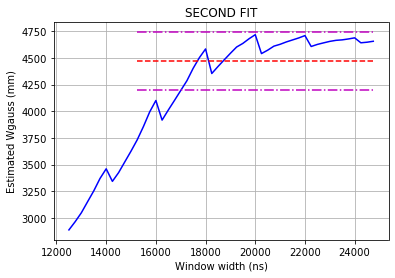

Wgauss = 6004.66768121283
Energy = 14188.667724634332
iEvt   = 30958


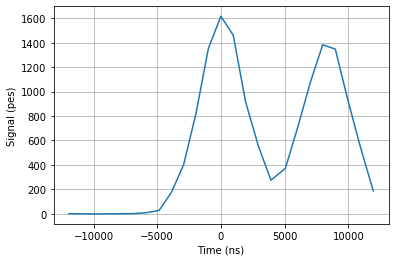

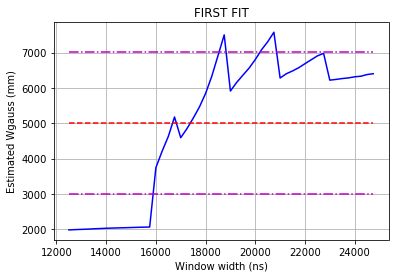

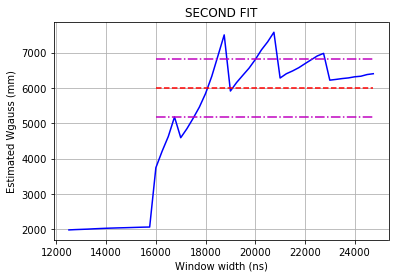

Nasty events:  []


In [18]:
# Get the Wgauss values by finding the flat line in the Wgauss vs window
all_Wgauss = []
nasty_events_W = []
functionality_cutoff = 2293.8670244413365

maxshow = 10
shown = 0
for ievt in range(len(events_window_Wgauss)):    
    
    nasty = False
    
    try:

        # First iteration of fit
        long_window_cut = events_window_cut > events_window_cut[-1] / 2
        xdata = events_window_cut[long_window_cut]
        ydata = events_window_Wgauss[ievt][long_window_cut]
        popt, pcov = curve_fit(const, xdata, ydata, p0 = np.mean(ydata))

        fitdata = const(xdata, *popt)
        stdev = np.std(ydata)
        errors = (fitdata - stdev, fitdata + stdev)

        stdev_mask = (ydata > errors[0]) & (ydata < errors[1])

        # Second iteration of fit, without outliers

        xdata2 = xdata[stdev_mask]
        ydata2 = ydata[stdev_mask]
        popt, pcov = curve_fit(const, xdata2, ydata2, p0 = np.mean(ydata))

        fitdata2 = const(xdata2, *popt)
        stdev2 = np.std(ydata2)
        errors2 = (fitdata2 - stdev2, fitdata2 + stdev2)

        Wgauss = popt[0]
        all_Wgauss.append(Wgauss)
        
        if (shown < maxshow and Emask[ievt] and Wgauss > 4000):
                        
            shown += 1
            
            print('Wgauss =', Wgauss)
            print('Energy =', events_energy[ievt])
            print('iEvt   =', ievt)
            
            # Plot the waveform
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
            plt.grid(True)
            plt.show()

            # Plot the first fit
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata, fitdata, '--', color='r')
            plt.plot(xdata, errors[0], '-.', color='m')
            plt.plot(xdata, errors[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Wgauss (mm)')
            plt.title('FIRST FIT')
            plt.grid(True)
            plt.show()

            # Plot the second fit
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata2, fitdata2, '--', color='r')
            plt.plot(xdata2, errors2[0], '-.', color='m')
            plt.plot(xdata2, errors2[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Wgauss (mm)')
            plt.title('SECOND FIT')
            plt.grid(True)
            plt.show()    
        
    except:
        
        Wgauss = 0
        all_Wgauss.append(Wgauss)
        nasty = True
        
        if Emask[ievt]:
            print('You might have an issue with event', ievt, ': it is big, but cannot fit a Z value.')
            nasty_events_W.append(ievt)
    
all_Wgauss = np.array(all_Wgauss)
good_W = all_Wgauss > 0
print('Nasty events: ', nasty_events_W)

##############
EVENT NUMBER 0 ; E = 4835.7
##############


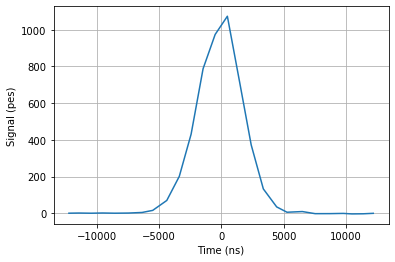

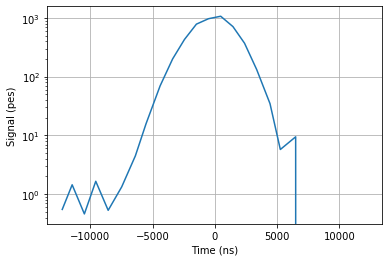

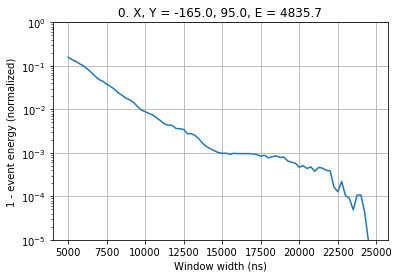

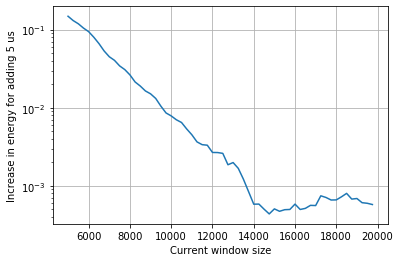

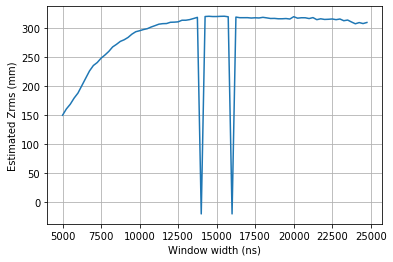

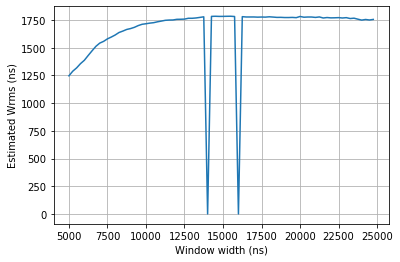

0.0
36


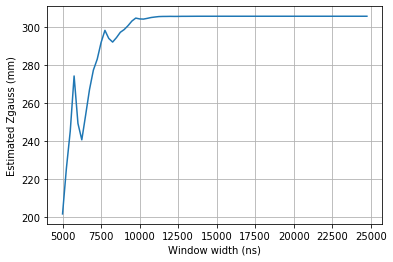

##############
EVENT NUMBER 7 ; E = 9169.8
##############


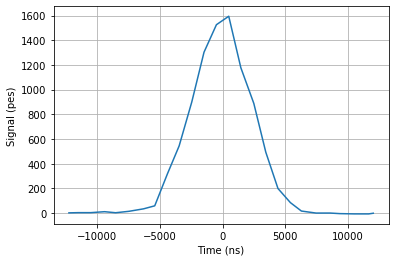

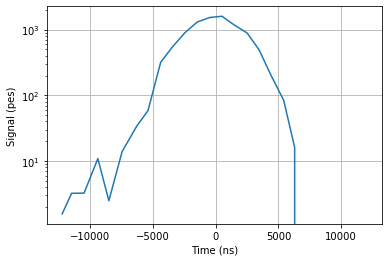

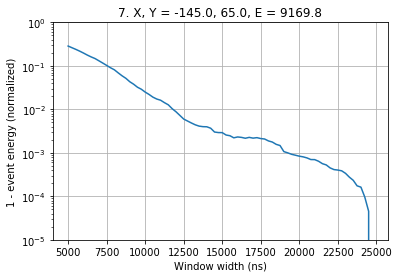

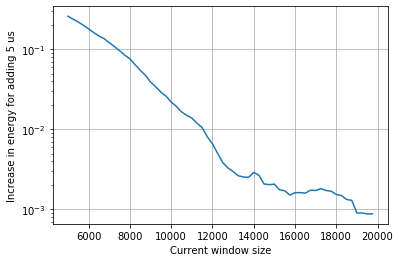

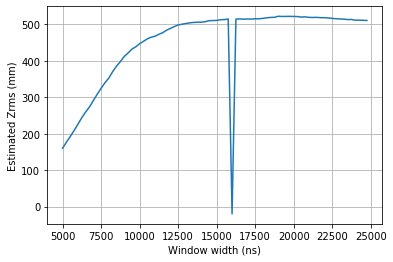

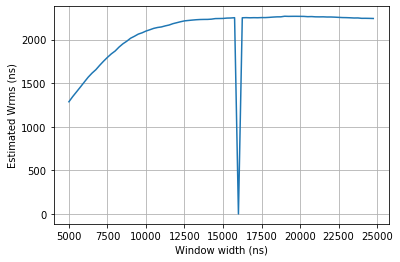

0.0
44


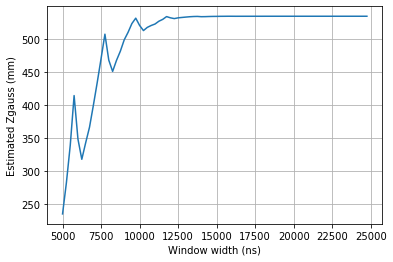

##############
EVENT NUMBER 16 ; E = 8439.3
##############


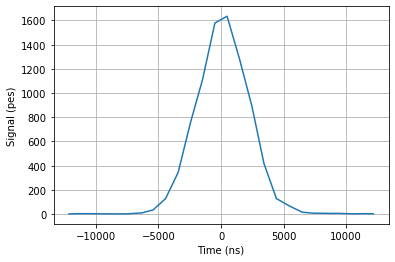

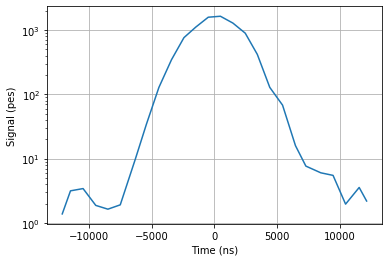

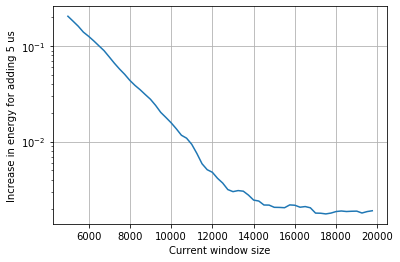

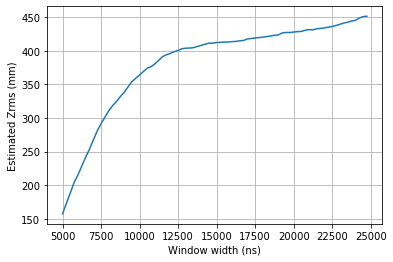

1275.7163246667506
0


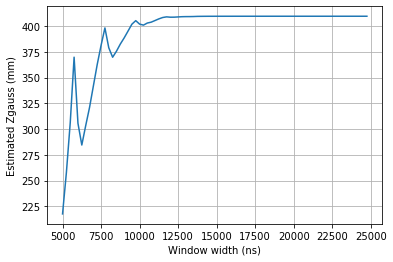

##############
EVENT NUMBER 22 ; E = 7361.5
##############


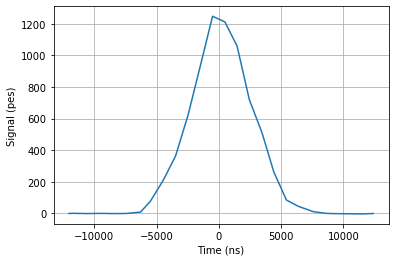

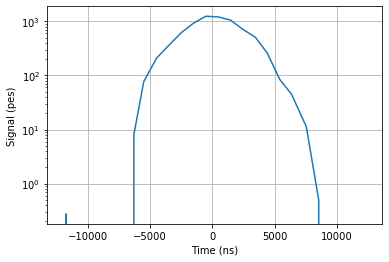

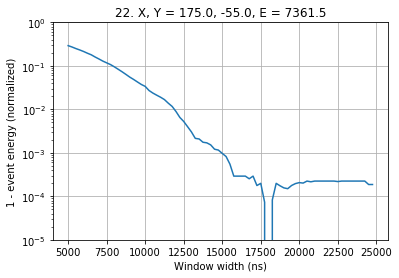

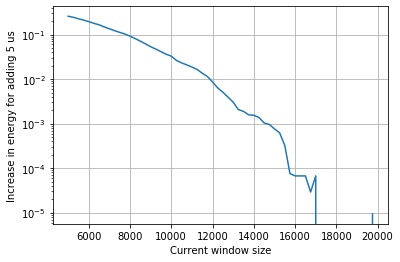

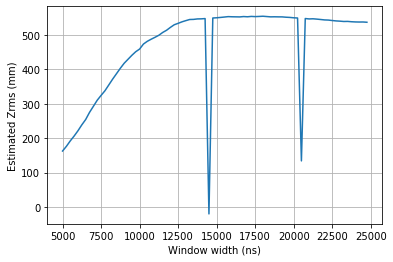

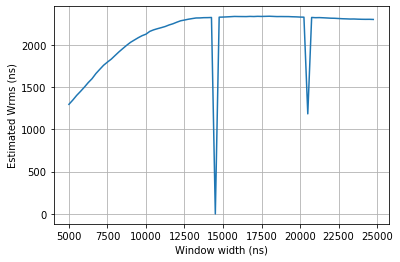

0.0
38


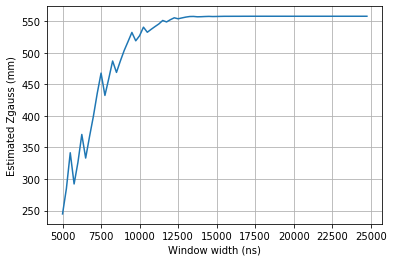

##############
EVENT NUMBER 23 ; E = 10823.0
##############


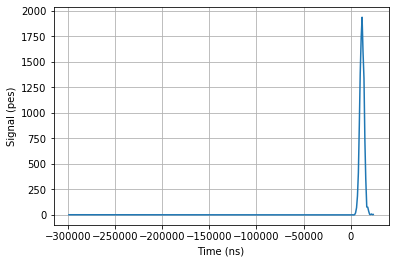

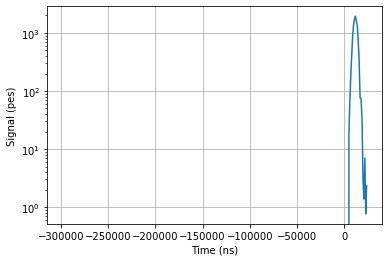

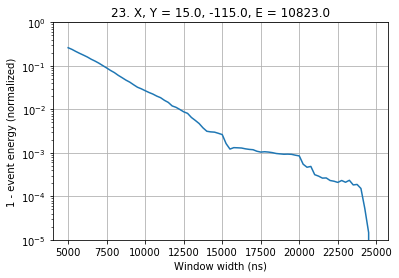

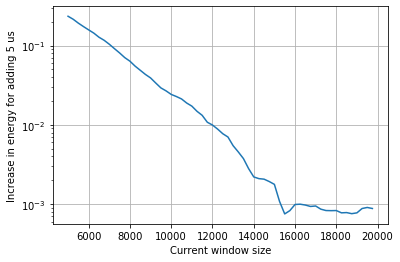

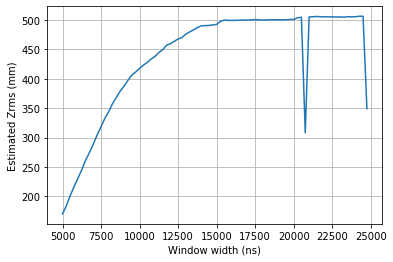

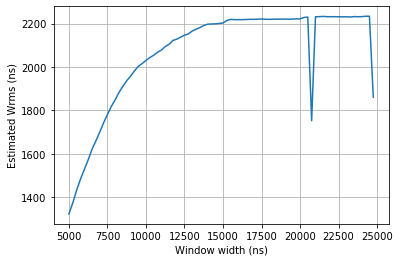

1323.7558262488158
0


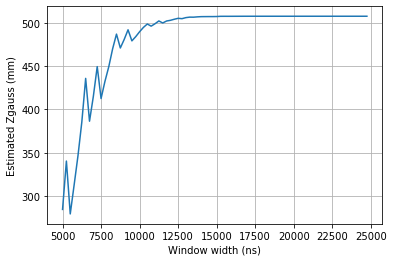

##############
EVENT NUMBER 24 ; E = 11289.3
##############


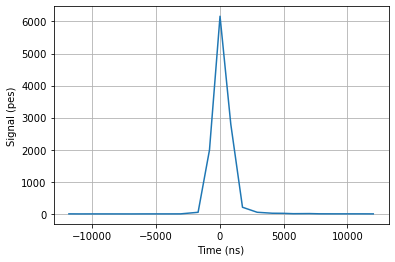

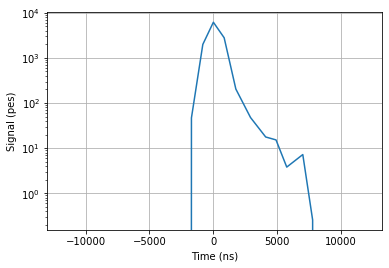

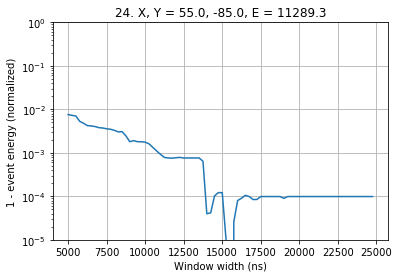

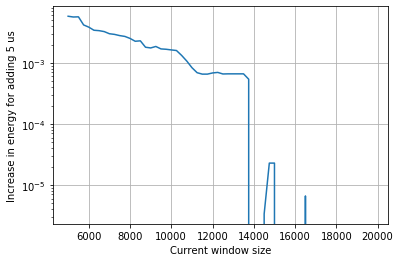

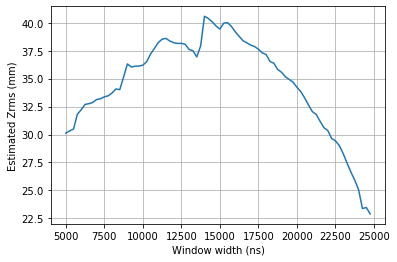

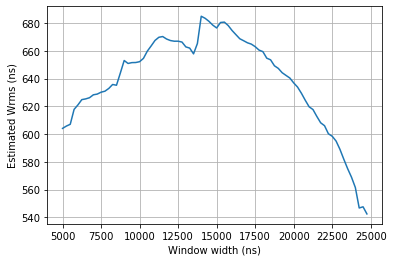

542.4371862459033
79


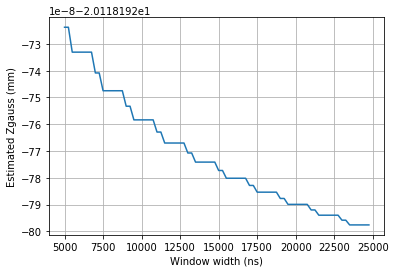

##############
EVENT NUMBER 27 ; E = 11378.9
##############


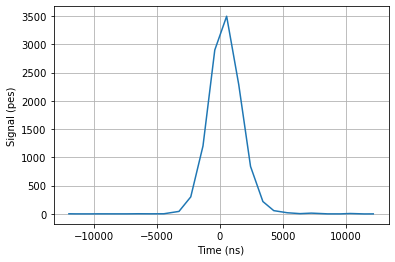

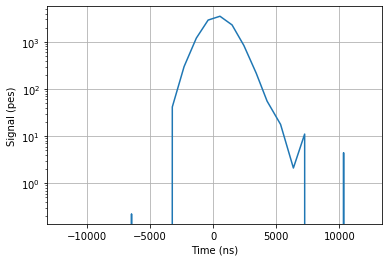

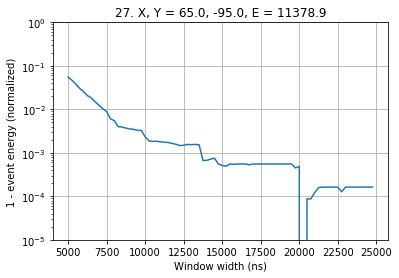

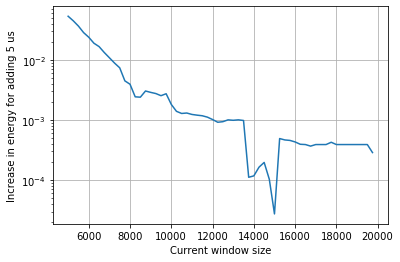

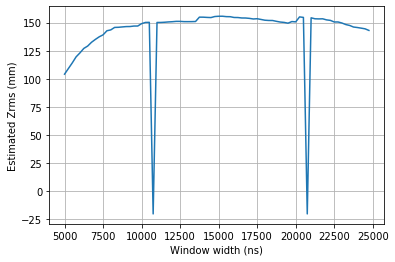

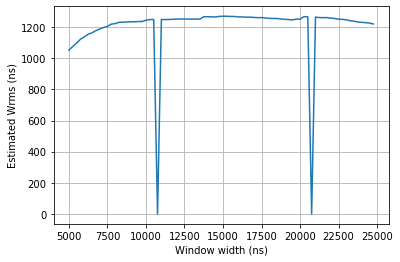

0.0
23


##############
EVENT NUMBER 40 ; E = 8805.2
##############


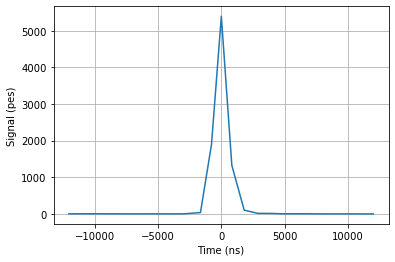

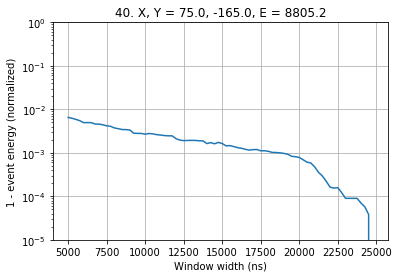

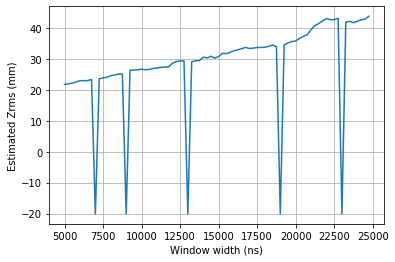

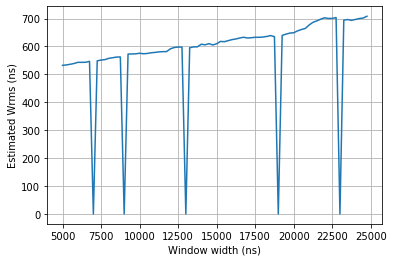

0.0
8


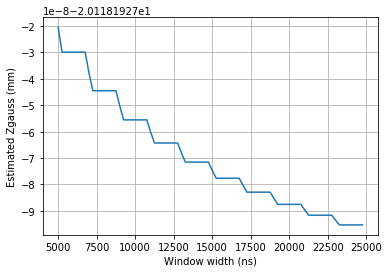

##############
EVENT NUMBER 43 ; E = 7619.3
##############


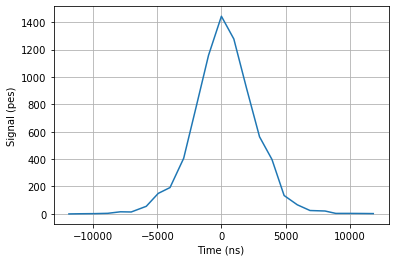

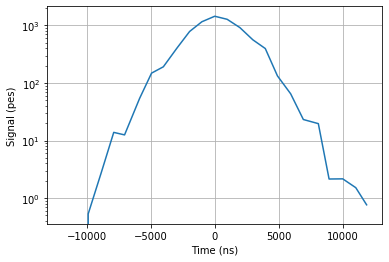

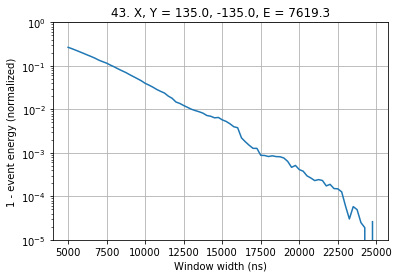

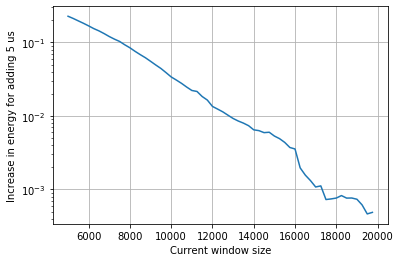

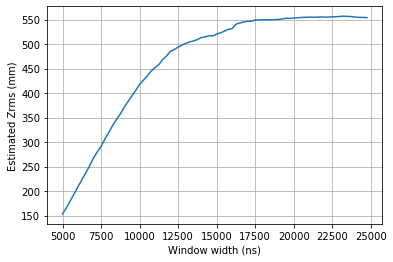

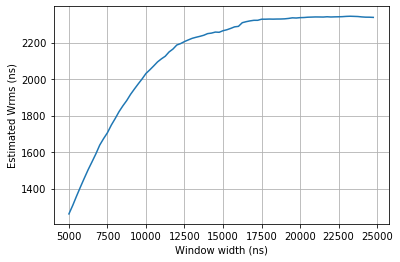

1261.63311619018
0


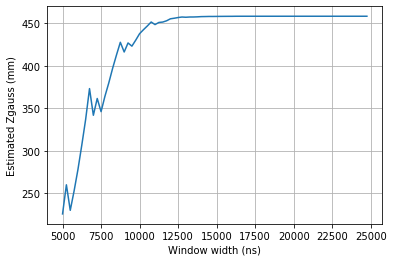

##############
EVENT NUMBER 44 ; E = 10792.3
##############


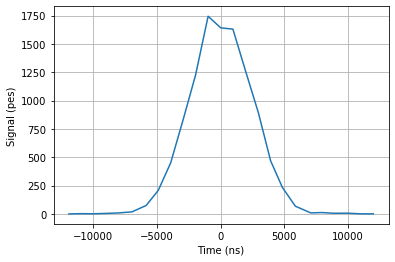

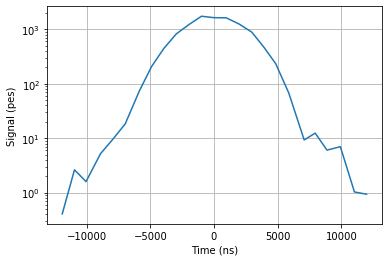

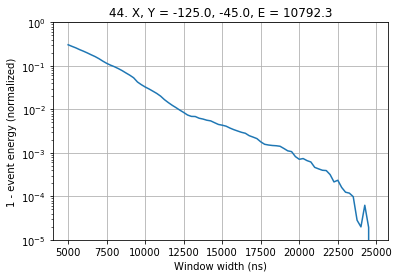

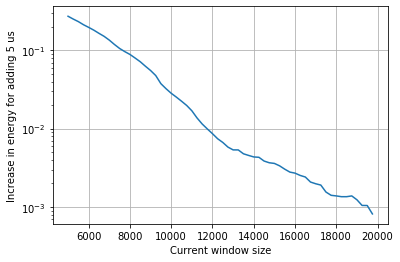

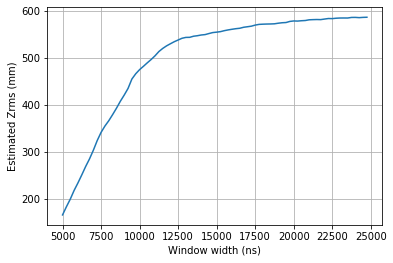

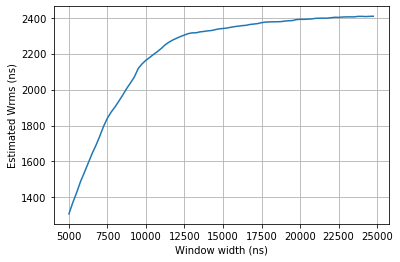

1308.4034759724527
0


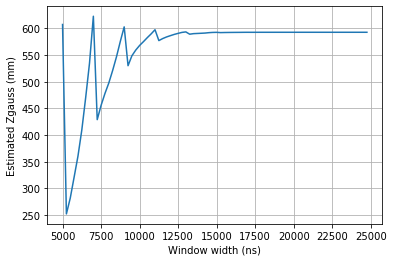

In [19]:
all_energy_cutoffs_999 = np.array([2 * (window_min + dwindow * np.argmax(window_energy_norm > 0.999)) * ns_per_sample for window_energy_norm in events_window_energy_norm])
all_energy_cutoffs_99 = np.array([2 * (window_min + dwindow * np.argmax(window_energy_norm > 0.99)) * ns_per_sample for window_energy_norm in events_window_energy_norm])
all_Zrms = np.array([ np.max(window_Zrms) for window_Zrms in events_window_Zrms ])
all_Wrms = np.array([ np.max(window_Wrms) for window_Wrms in events_window_Wrms ])
all_Xs = np.array( [window_maxX[-1] for window_maxX in events_window_maxX] )
all_Ys = np.array( [window_maxY[-1] for window_maxY in events_window_maxY] )

maxshow = 10
shown = 0
for i_evt in range(len(events_window_energy_norm)):
        
    if shown < maxshow and Emask[i_evt]:

        X = events_window_maxX[i_evt][-1]
        Y = events_window_maxY[i_evt][-1]
        E = round(max(events_window_energy[i_evt]), 1)
        
        shown += 1

        print('##############')
        print('EVENT NUMBER', i_evt, '; E =', E)
        print('##############')
        
        # Plot the waveform
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the waveform, log scale
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.yscale('log')
        plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the energy vs window width
        normed = np.array(events_window_energy_norm[i_evt])
        normed = 1 - normed
        plt.ylim(10**-5,10**0)
        plt.yscale('log')
        plt.title(str(i_evt)+'. X, Y = '+str(X)+', '+str(Y)+', E = '+str(E))
        plt.xlabel('Window width (ns)')
        plt.ylabel('1 - event energy (normalized)')
        plt.grid(True)
        plt.plot(events_window_cut, normed)
        plt.show()

        # Plot the increase for including 5 more us
        windows_in_5_us = int((5000 / ns_per_sample) / (2 * dwindow))
        change_next_five_us = np.array(events_window_energy_norm[i_evt][windows_in_5_us:]) - np.array(events_window_energy_norm[i_evt][:-windows_in_5_us])    
        plt.xlabel('Current window size')
        plt.ylabel('Increase in energy for adding 5 us')
        plt.yscale('log')
        plt.plot(events_window_cut[:-windows_in_5_us], change_next_five_us)
        plt.grid(True)
        plt.show()

        # Plot the Zrms estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zrms (mm)')
        plt.plot(events_window_cut, events_window_Zrms[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the Wrms estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Wrms (ns)')
        plt.plot(events_window_cut, events_window_Wrms[i_evt])
        plt.grid(True)
        plt.show()

        print(min(events_window_Wrms[i_evt]))
        print(np.argmin(np.array(events_window_Wrms[i_evt])))
        
        # Plot the Zgauss estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zgauss (mm)')
        plt.plot(events_window_cut, events_window_Zgauss[i_evt])
        plt.grid(True)
        plt.show()

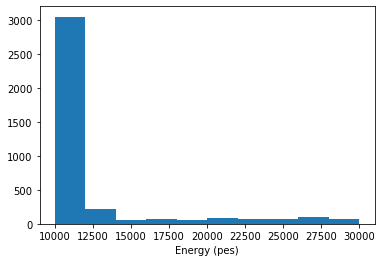

In [113]:
plt.hist(events_energy, bins = 10, range=(10000, 30000))
plt.xlabel('Energy (pes)')
plt.show()


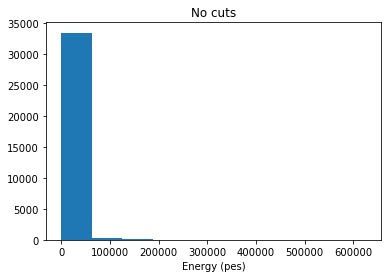

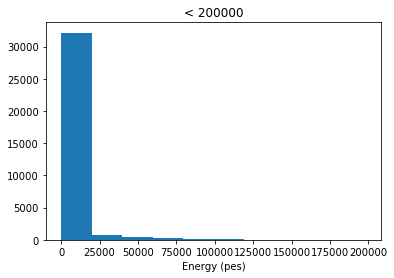

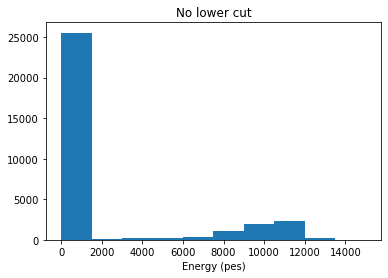

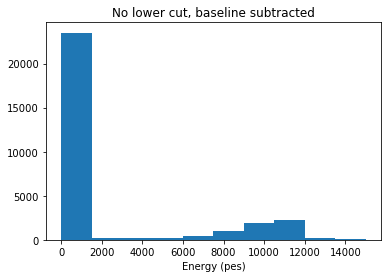

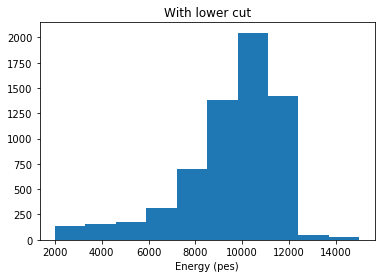

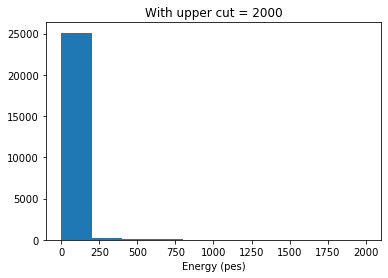

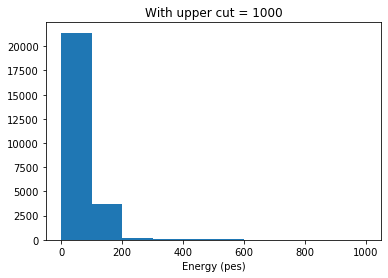

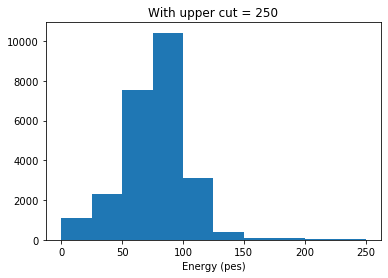

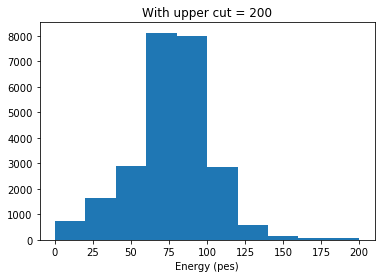

Fraction below cutoff = 74.0


In [107]:
plt.title('No cuts')
plt.hist(events_energy, bins = 10)
plt.xlabel('Energy (pes)')
plt.show()

plt.title('< 125000')
plt.hist(events_energy[events_energy < 125000], bins = 10)
plt.xlabel('Energy (pes)')
plt.show()

plt.title('No lower cut')
plt.hist(events_energy, bins = 10, range = (0, Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

plt.title('No lower cut, baseline subtracted')
plt.hist(events_energy_subtracted, bins = 10, range = (0, Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

plt.title('With lower cut')
plt.hist(events_energy, bins = 10, range = (Ecut[0], Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

plt.title('With upper cut = 2000')
plt.hist(events_energy, bins = 10, range = (0, 2000))
plt.xlabel('Energy (pes)')
plt.show()

plt.title('With upper cut = 1000')
plt.hist(events_energy, bins = 10, range = (0, 1000))
plt.xlabel('Energy (pes)')
plt.show()

plt.title('With upper cut = 250')
plt.hist(events_energy, bins = 10, range = (0, 250))
plt.xlabel('Energy (pes)')
plt.show()

low_energy_cutoff = 200
plt.title('With upper cut = '+str(low_energy_cutoff))
plt.hist(events_energy, bins = 10, range = (0, low_energy_cutoff))
plt.xlabel('Energy (pes)')
plt.show()

print('Fraction below cutoff =', round(100*len(events_energy[events_energy < low_energy_cutoff])/len(events_energy),1))

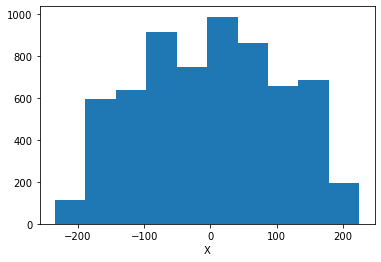

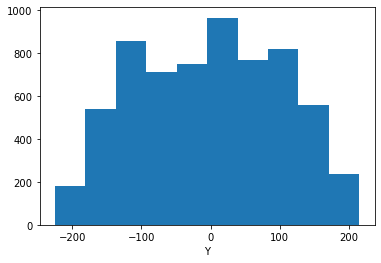

In [21]:
plt.hist(all_Xs[Emask])
plt.xlabel('X')
plt.show()

plt.hist(all_Ys[Emask])
plt.xlabel('Y')
plt.show()

In [22]:
print(len(all_Xs))
print(len(Emask))
print(len(all_Zgauss))

33895
33895
33895


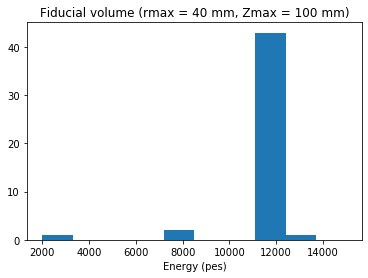

In [23]:
rmax = 40
fid = Emask & ((all_Xs**2 + all_Ys**2) < rmax**2) & (all_Zgauss < 100)
plt.title('Fiducial volume (rmax = 40 mm, Zmax = 100 mm)')
plt.hist(events_energy[fid], bins = 10, range = (Ecut[0], Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

In [24]:
# A circle with radius R can inscribe a square of diagonal 2R, and the sides obey
# a2 + a2 = c2 = (2R)2 = 4R2
# So 2a2 = 4R2 => a = sqrt(2) R
# Thus, the min and max x and y are R / sqrt(2)

In [25]:
R = 200
boundaries = np.linspace(-R / sqrt(2), R / sqrt(2), 6)
intervals = [ (round(boundaries[i],1), round(boundaries[i+1],1)) for i in range(len(boundaries) - 1)]

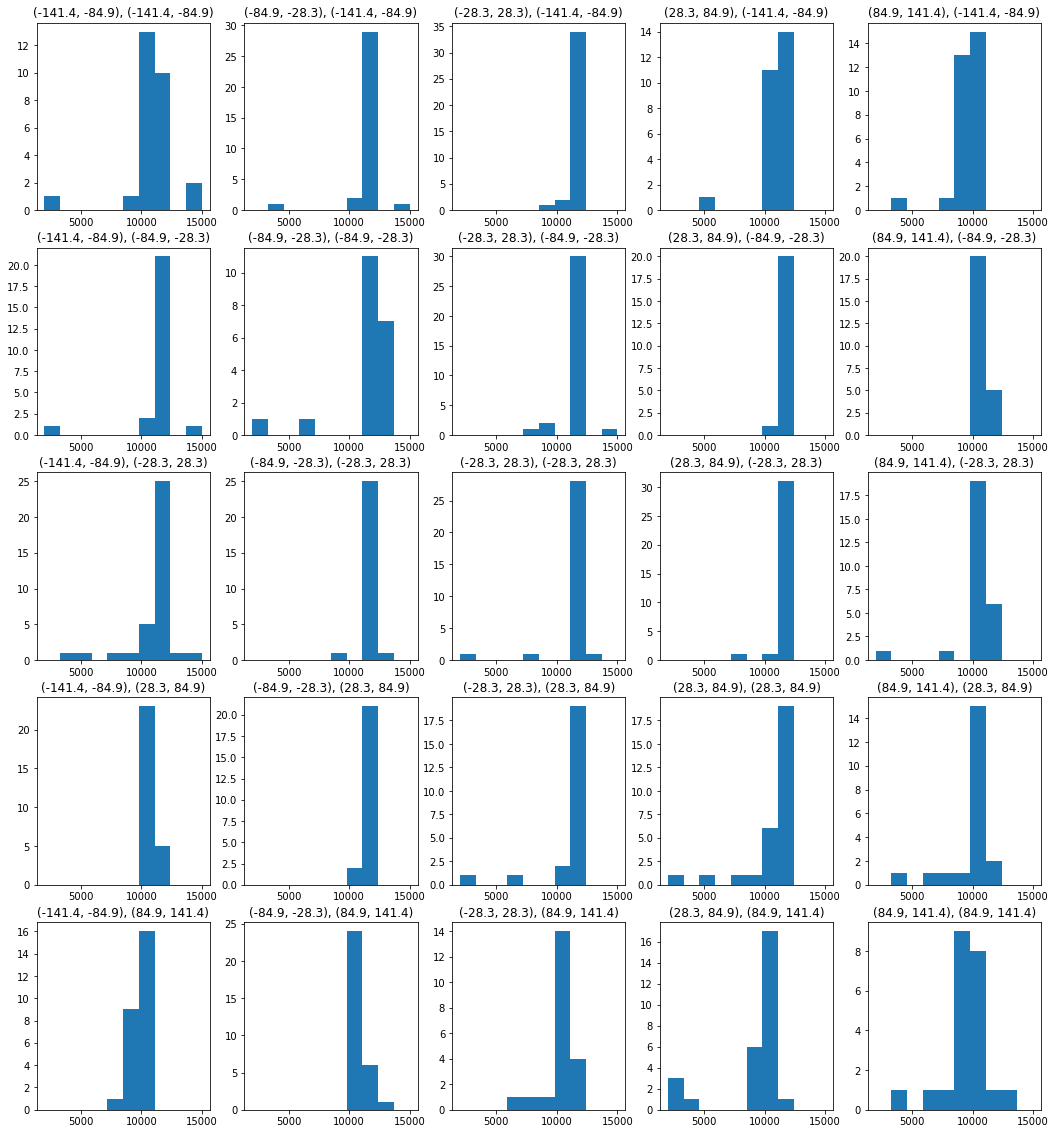

In [26]:
fig, axs = plt.subplots(len(intervals), len(intervals), figsize=(18, 20))

for ix in range(len(intervals)):
    for iy in range(len(intervals)):
        xr = intervals[ix]
        yr = intervals[iy]
        region = Emask & (xr[0] < all_Xs) & (all_Xs < xr[1]) & (yr[0] < all_Ys) & (all_Ys < yr[1]) & (all_Zgauss < 100)
        axs[iy, ix].hist(events_energy[region], range = (Ecut[0], Ecut[1]))
        axs[iy, ix].set_title(str(xr)+', '+str(yr))

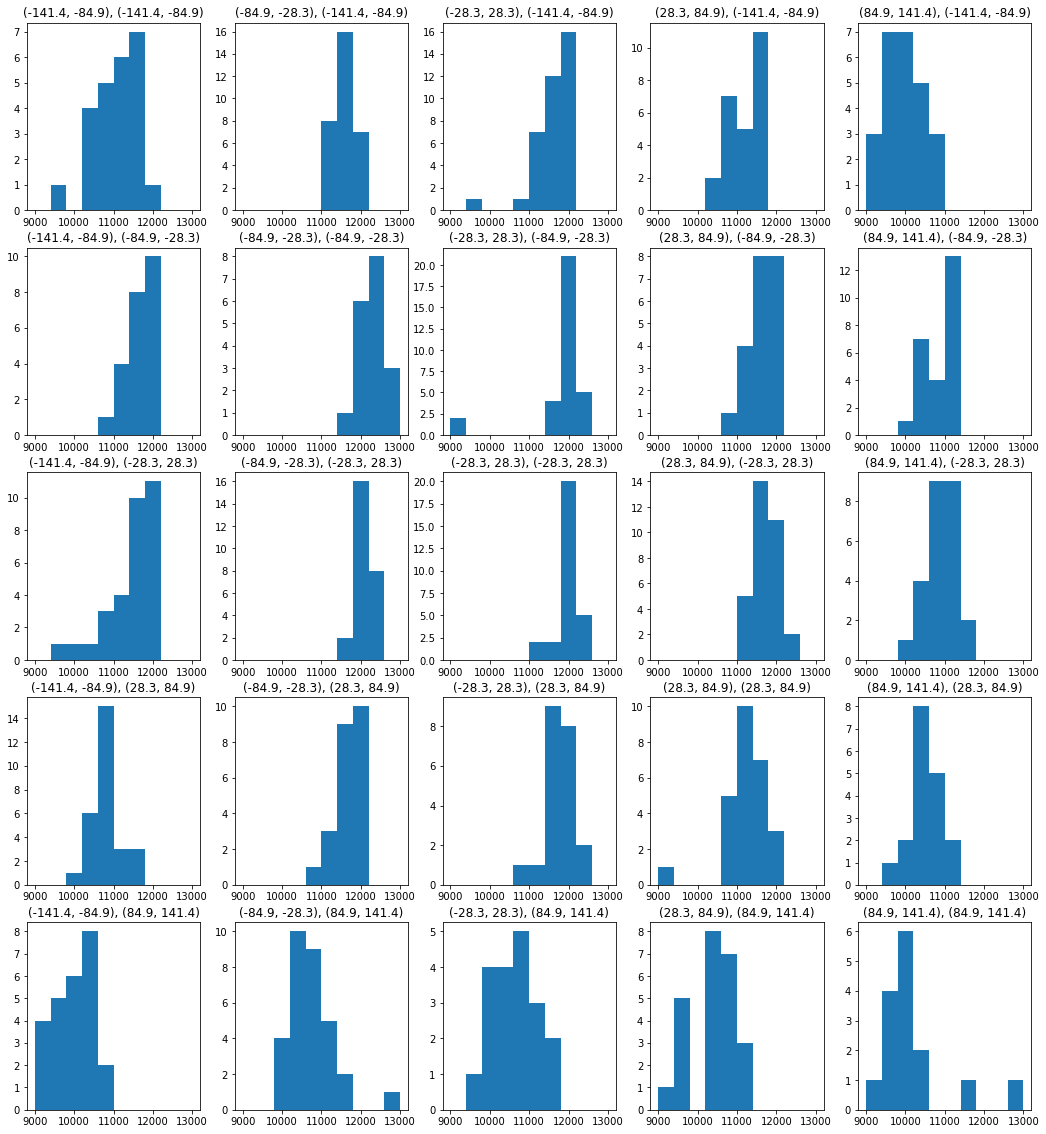

In [27]:
fig, axs = plt.subplots(len(intervals), len(intervals), figsize=(18, 20))

for ix in range(len(intervals)):
    for iy in range(len(intervals)):
        xr = intervals[ix]
        yr = intervals[iy]
        region = Emask & (xr[0] < all_Xs) & (all_Xs < xr[1]) & (yr[0] < all_Ys) & (all_Ys < yr[1]) & (all_Zgauss < 100)
        axs[iy, ix].hist(events_energy[region], range = (11000-2000, 11000+2000))
        axs[iy, ix].set_title(str(xr)+', '+str(yr))

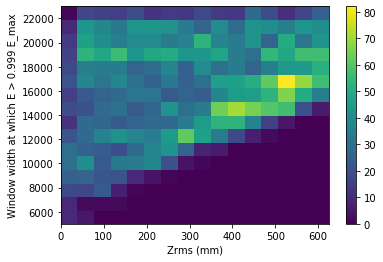

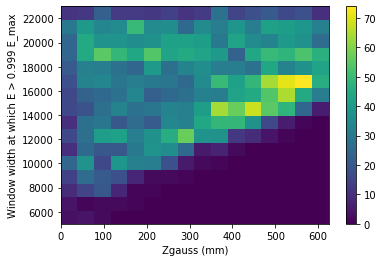

In [28]:
window_range = (5000, 23000)
bins = (16, 16)
zrange = (0, 625)

hrms = plt.hist2d(all_Zrms[Emask], all_energy_cutoffs_999[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss[Emask], all_energy_cutoffs_999[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hgauss[3])
plt.show()

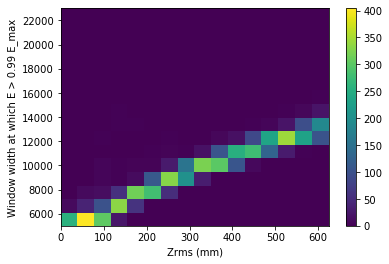

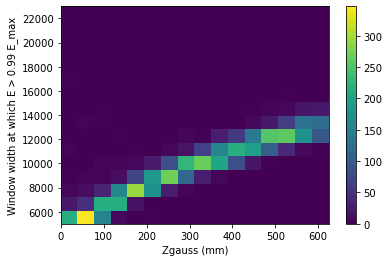

In [29]:
hrms = plt.hist2d(all_Zrms[Emask], all_energy_cutoffs_99[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hgauss[3])
plt.show()

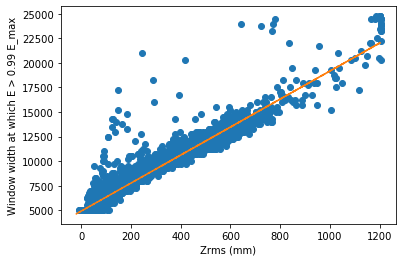

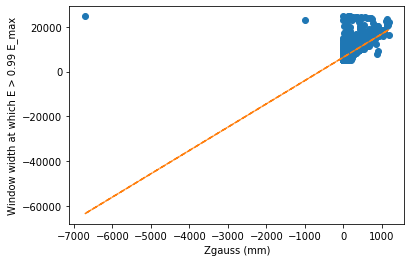

In [30]:
p = np.polyfit(all_Zrms[Emask], all_energy_cutoffs_99[Emask], 1)
line = np.array(all_Zrms)*p[0] + p[1]
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zrms[Emask], all_energy_cutoffs_99[Emask], 'o')
plt.plot(all_Zrms, line, '--')
plt.show()

p = np.polyfit(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], 1)
line = np.array(all_Zgauss[Emask])*p[0] + p[1]
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], 'o')
plt.plot(all_Zgauss[Emask], line, '--')
plt.show()

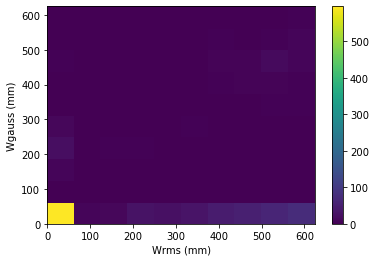

In [31]:
hW = plt.hist2d(all_Wrms, all_Wgauss, range = (zrange, zrange))
plt.xlabel('Wrms (mm)')
plt.ylabel('Wgauss (mm)')
plt.colorbar(hW[3])
plt.show()

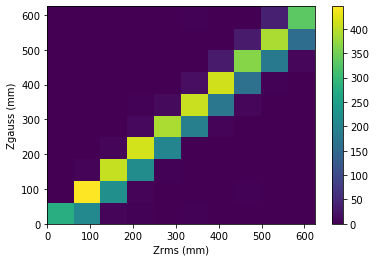

In [32]:
hZ = plt.hist2d(all_Zrms[Emask], all_Zgauss[Emask], range = (zrange, zrange))
plt.xlabel('Zrms (mm)')
plt.ylabel('Zgauss (mm)')
plt.colorbar(hZ[3])
plt.show()

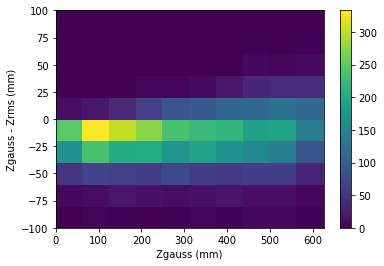

In [33]:
all_dZ = np.array(all_Zgauss[Emask]) - np.array(all_Zrms[Emask])
dzrange = (-100, 100)
hdZ = plt.hist2d(all_Zgauss[Emask], all_dZ, range = (zrange, dzrange))
plt.xlabel('Zgauss (mm)')
plt.ylabel('Zgauss - Zrms (mm)')
plt.colorbar(hdZ[3])
plt.show()

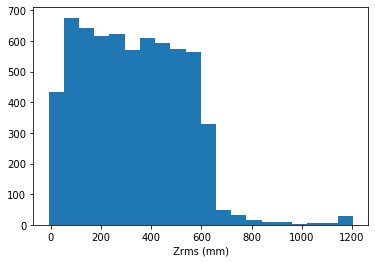

In [34]:
plt.hist(all_Zrms[Emask], bins = 20)
plt.xlabel('Zrms (mm)')
plt.show()

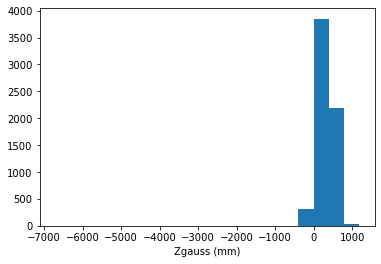

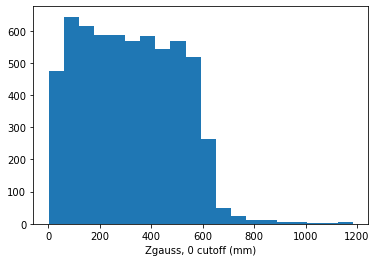

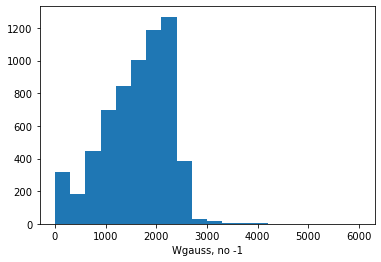

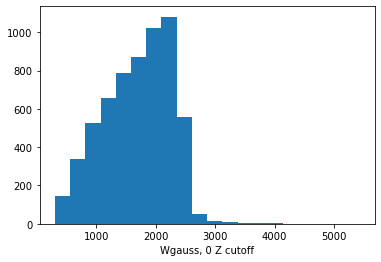

In [35]:
plt.hist(all_Zgauss[Emask], bins = 20)
plt.xlabel('Zgauss (mm)')
plt.show()

plt.hist(all_Zgauss[Emask & (all_Zgauss > 0)], bins = 20)
plt.xlabel('Zgauss, 0 cutoff (mm)')
plt.show()

plt.hist(all_Wgauss[Emask & (all_Wgauss != -1)], bins = 20)
plt.xlabel('Wgauss, no -1')
plt.show()

plt.hist(all_Wgauss[Emask & (all_Zgauss > 0)], bins = 20)
plt.xlabel('Wgauss, 0 Z cutoff')
plt.show()

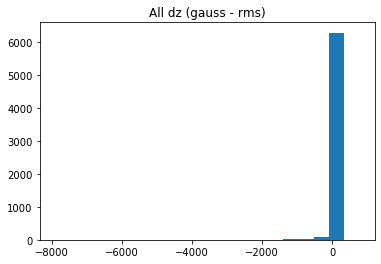

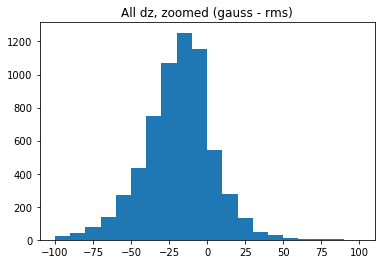

In [36]:
dZ = all_Zgauss[Emask] - all_Zrms[Emask]

plt.hist(dZ, bins = 20)
plt.title('All dz (gauss - rms)')
plt.show()

plt.hist(dZ, bins = 20, range = (-100, 100))
plt.title('All dz, zoomed (gauss - rms)')
plt.show()

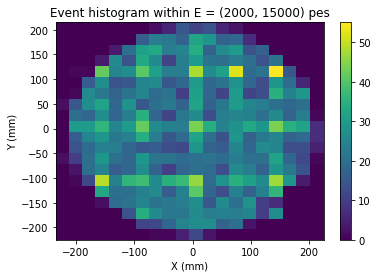

In [37]:
hxy = plt.hist2d(all_Xs[Emask], all_Ys[Emask], bins = 20)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram within E = '+str(Ecut)+' pes')
plt.colorbar(hxy[3])
plt.show()

In [38]:
ntotal  = len(events_sumwf)
nselect = len(events_sumwf[Emask])
selper  = round(100 * nselect / ntotal, 1)
print('Number of total events    =', ntotal)
print('Number of selected events =', nselect)
print('Selected percent          =', selper, '%')

Number of total events    = 33895
Number of selected events = 6395
Selected percent          = 18.9 %


In [39]:
max(all_Wgauss < 0)

True

In [40]:
max(all_Wgauss[all_Zgauss < 0])

104869.82760494738

In [41]:
exp_dt(129313.45734208505/1000)

-2685045733.8538017

In [42]:
print(all_Wgauss[(all_Wgauss != -1) & (all_Wgauss < 0)])

[-0.02438711 -0.20407963 -0.13332741 -0.04081232 -0.02325227 -0.48648618
 -0.08162628 -0.02325046]


In [43]:
-0.9534880861740195**2

-0.9091395304757944

In [44]:
(-0.909)**0.5

(5.837982619106597e-17+0.9534149149242422j)

In [45]:
events_window_Wgauss

array([[1.43457344e+03, 1.51239904e+03, 1.57294311e+03, ...,
        1.74608114e+03, 1.74608114e+03, 1.74608114e+03],
       [1.54990858e+03, 1.69302803e+03, 1.57711592e+03, ...,
        1.27934820e+04, 1.49475480e+04, 1.37018407e+04],
       [1.68565756e+03, 2.00901728e+03, 2.30270024e+03, ...,
        8.71015148e+03, 8.84383790e+03, 9.11917910e+03],
       ...,
       [9.61735056e-06, 9.61736604e-06, 9.25378901e-06, ...,
        6.73038911e-06, 6.73037215e-06, 6.73032649e-06],
       [1.66905308e+03, 1.79944088e+03, 1.71152524e+03, ...,
        9.20299183e+03, 9.42684577e+03, 9.20819708e+03],
       [6.27415105e-06, 6.27423056e-06, 6.27481507e-06, ...,
        4.34492916e-06, 4.34480140e-06, 4.34516036e-06]])

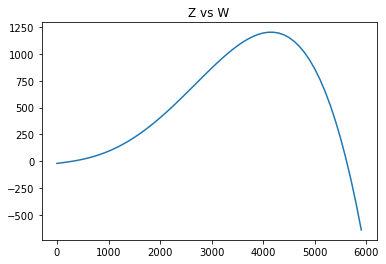

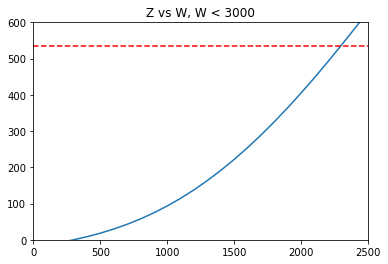

In [46]:
Ws = np.arange(0, 6000, 100)
Zs = exp_dt(Ws / 1000)
cutoff = Ws*0 + 534

plt.plot(Ws, Zs)
plt.title('Z vs W')
plt.show()

plt.plot(Ws, Zs)
plt.plot(Ws, cutoff, '--', color='r')
plt.title('Z vs W, W < 3000')
plt.xlim(0, 2500)
plt.ylim(0, 600)
plt.show()

In [47]:
# The cutoff W is the point where exp_dt gives an estimate beyond the
# chamber depth for the Z location of the event

max_depth = 534

def max_depth_offset(W):
    return (exp_dt(W/1000) - max_depth)**2

from scipy.optimize import minimize

cutoff_guess = 2300
res = minimize(max_depth_offset, cutoff_guess)

print('Cutoff value =', res['x'][0])

Cutoff value = 2293.8670244413365


In [48]:
def weighted_avg_and_std(values, weights, debug=False):
    """
    Return the weighted average and standard deviation
    values, weights -- Numpy ndarrays with the same shape.
    """
    if debug:
        print('Input values   =', values)
        print('Input weights  =', weights)
        print('Sum of weights =', np.sum(weights))

    if np.sum(weights) > 0:
        average = np.average(values, weights=weights)
        variance = np.average((values-average)**2, weights=weights)
        if debug: print('Average, variance =', average, variance)
        std = np.sqrt(max(0.,variance))
    else:
        if debug:
            print('WARNING - NOT ENOUGH WEIGHTS TO CALCULATE.')
        average = np.mean(values)
        std = 0.

    return average, std

0 , 0
R2 = 0.9965658717172529
E  = 4835.684364869376


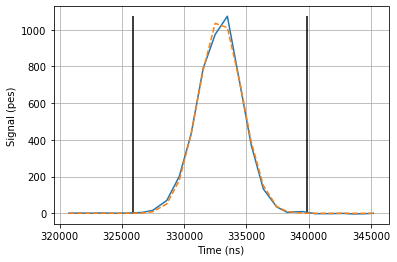

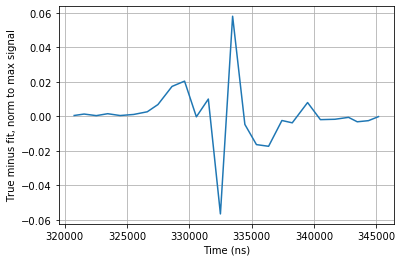

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.986868370399484
E  = 1324.5355004368564


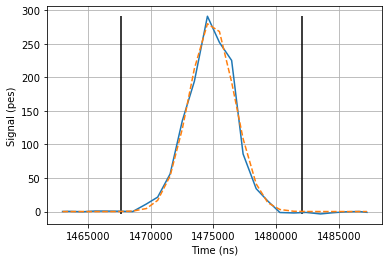

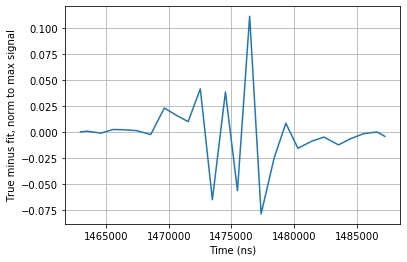

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9718929894930259
E  = 76494.15192784781


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.962742379179089
E  = 11189.205944360765


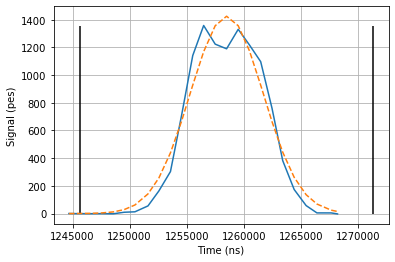

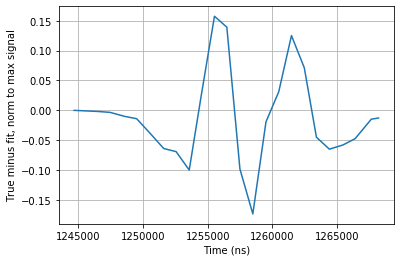

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.618682683590182
E  = 216633.14222899647


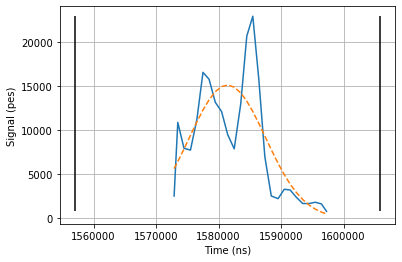

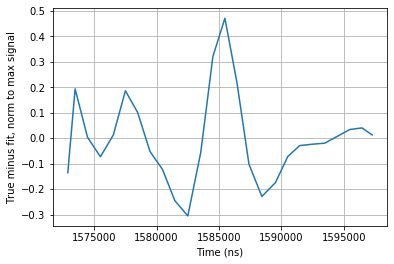

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9492919353600482
E  = 47450.7015762672


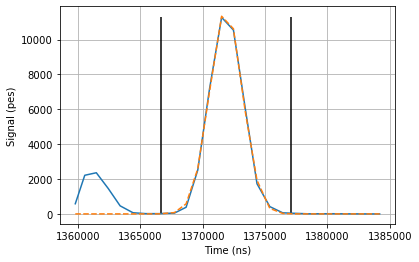

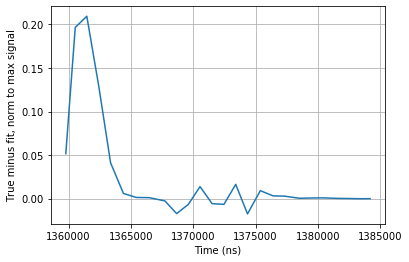

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1000 , 1000
R2 = 0.5690242803480305
E  = 279091.6450715655


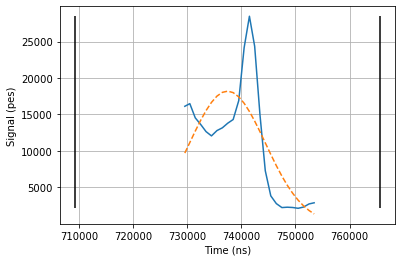

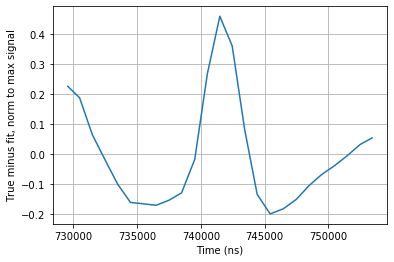

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9589603329907993
E  = 205975.1834588274


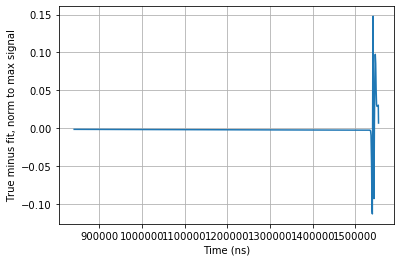

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


2000 , 2000
R2 = 0.9131398136002874
E  = 105.2550817389255


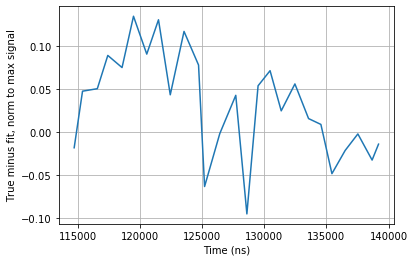

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


3000 , 3000
R2 = 0.9029234970138
E  = 36579.617858382415


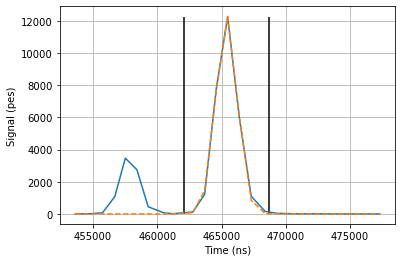

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8965573638174927
E  = 41767.37086184743


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


4000 , 4000
R2 = 0.9771139230819673
E  = 395987.85501040966


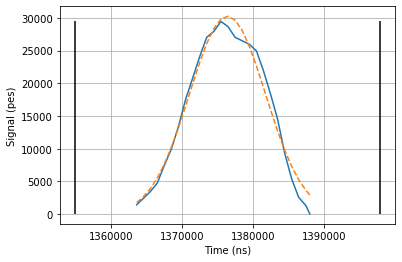

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9837727647455963
E  = 218081.7071790537


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


5000 , 5000
R2 = 0.8696742914286759
E  = 186512.12785844816


/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8527650922616414
E  = 26722.010172287144


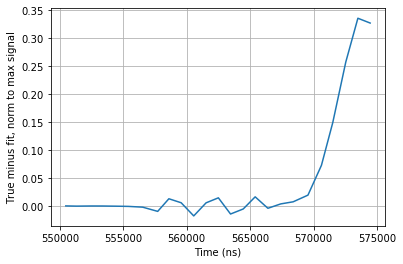

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8996080689023342
E  = 331475.9329832805


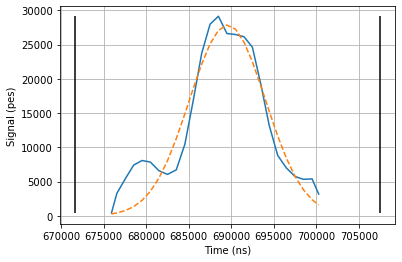

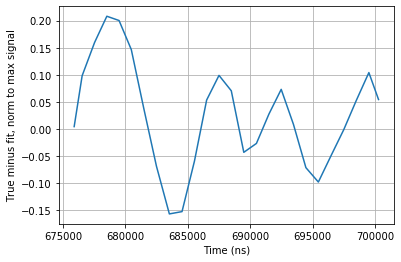

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


6000 , 6000
R2 = 0.8391488244606882
E  = 72.33604274874901


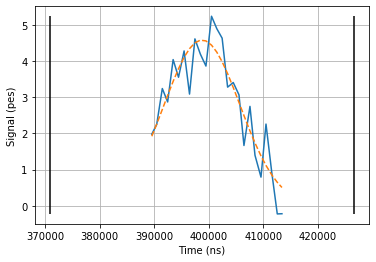

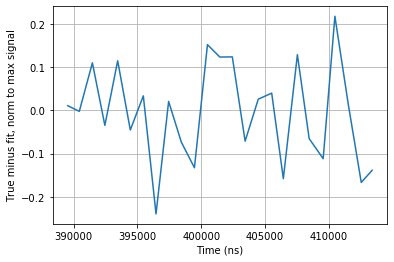

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


7000 , 7000
R2 = 0.8276047797488727
E  = 92.54493389238846


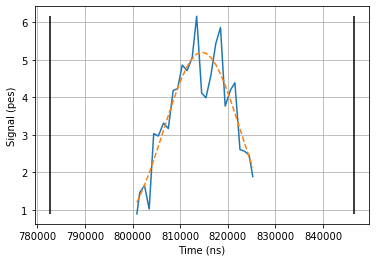

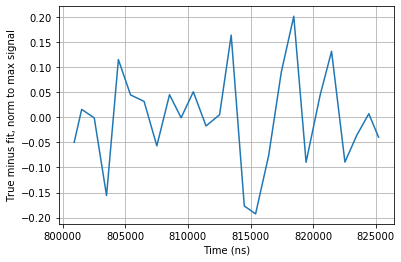

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8168551508103272
E  = 96.79437244170558


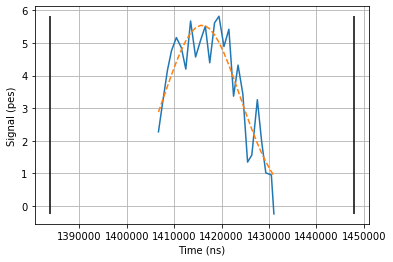

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9143819552658493
E  = 212328.78737951236


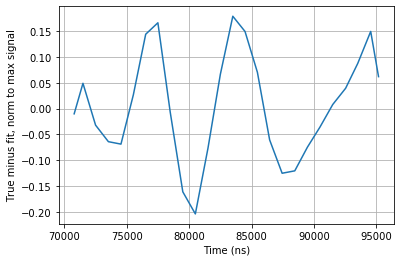

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8655597166669698
E  = 215682.020995322


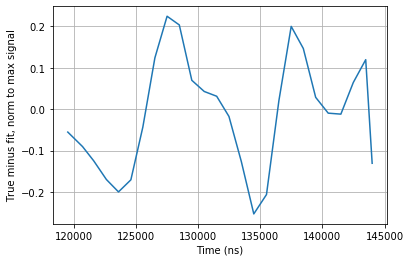

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


8000 , 8000
R2 = 0.9376016747341747
E  = 242205.8010340829


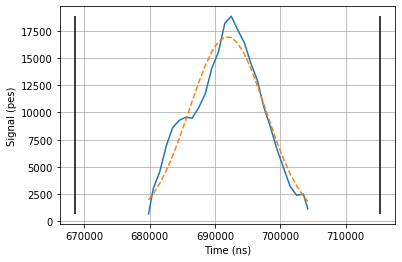

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


9000 , 9000
R2 = 0.2875867761651736
E  = 211807.74549215395


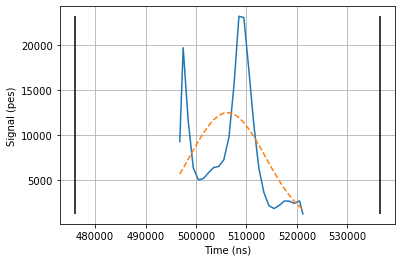

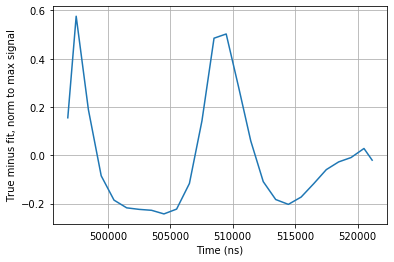

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


10000 , 10000
11000 , 11000
12000 , 12000
R2 = 0.5505536517799843
E  = 241576.85284563762


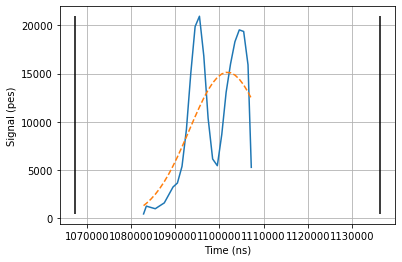

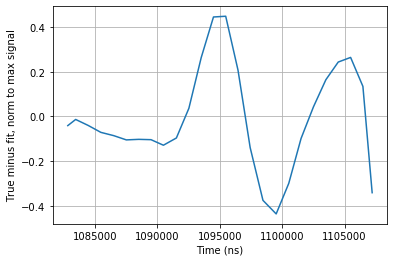

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


13000 , 13000
14000 , 14000
R2 = 0.7516563069911743
E  = 207605.06850897733


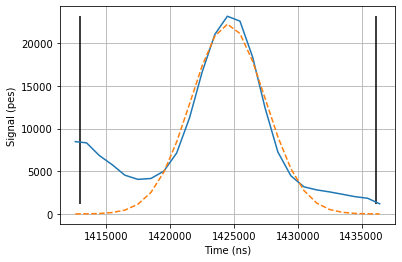

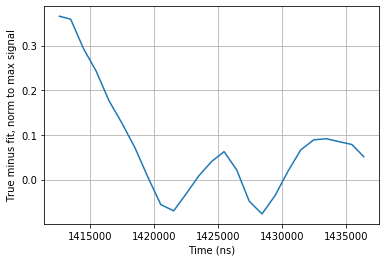

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


15000 , 15000
16000 , 16000
17000 , 17000
18000 , 18000
R2 = 0.7118480719325561
E  = 372105.8642250248


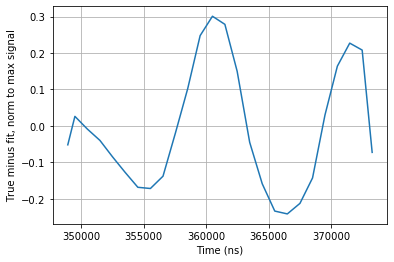

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


19000 , 19000
R2 = 0.9590800853498231
E  = 262534.08956513845


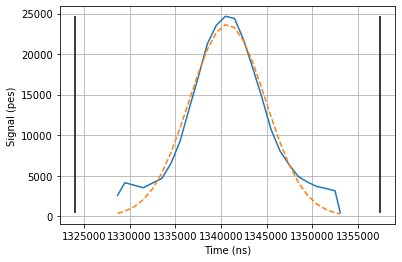

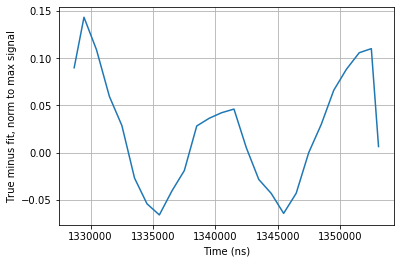

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9862200372877762
E  = 523955.9960828927


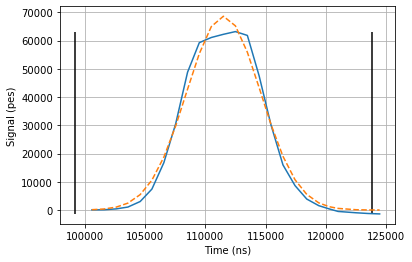

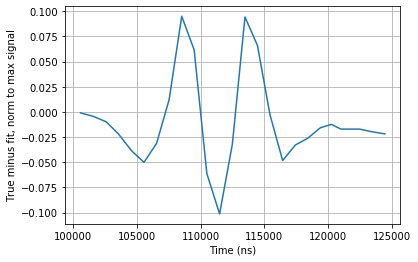

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


20000 , 20000
R2 = 0.35221826097062103
E  = 278433.3891805552


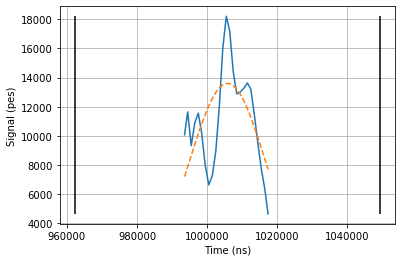

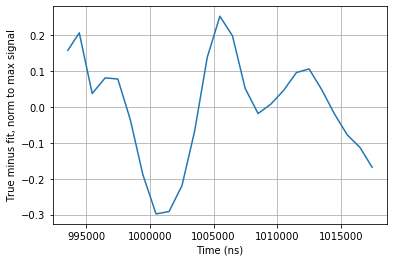

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


21000 , 21000
22000 , 22000
R2 = 0.9359846363738017
E  = 226541.9158771254


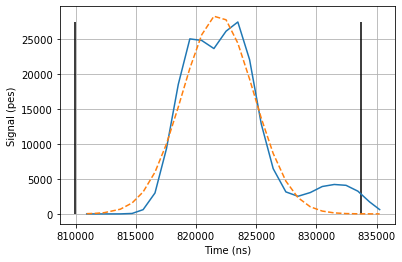

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


23000 , 23000
24000 , 24000
R2 = 0.9776133238698986
E  = 222634.09918355674


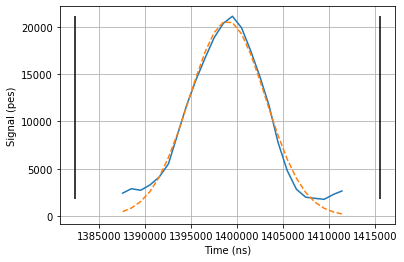

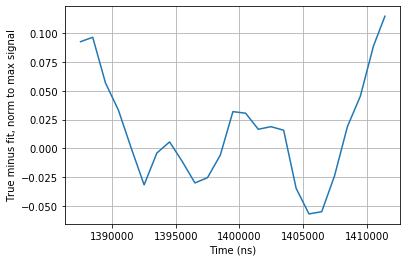

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


25000 , 25000
R2 = 0.7029699131760998
E  = 324405.70128003275


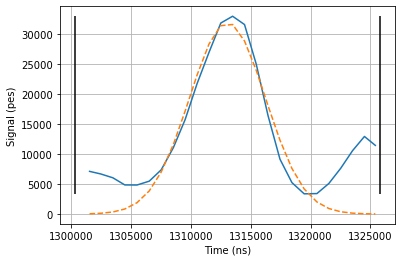

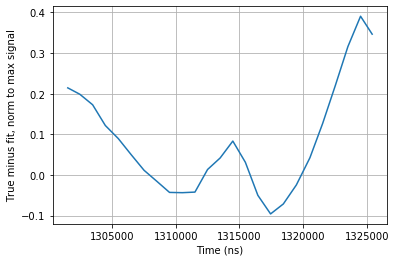

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.867188503776156
E  = 321948.7465498762


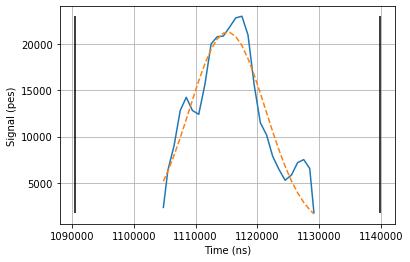

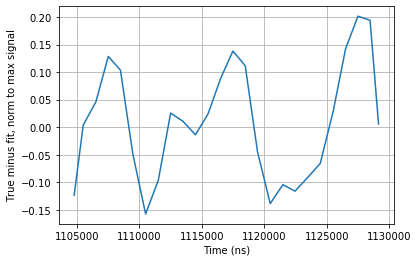

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


26000 , 26000
R2 = 0.8410137891573977
E  = 207435.51816028391


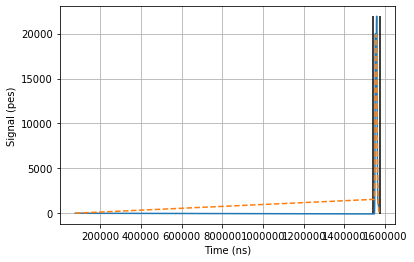

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.6978465157671669
E  = 267690.21628615574


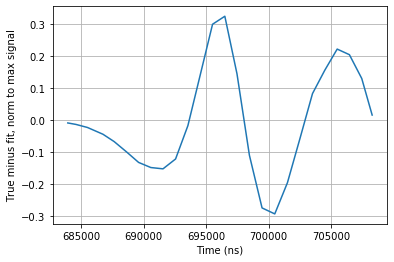

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.931162269263727
E  = 359326.95789141336


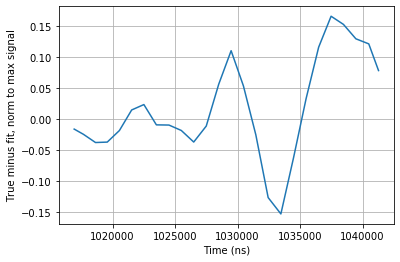

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.7923452764259025
E  = 238535.36325696012


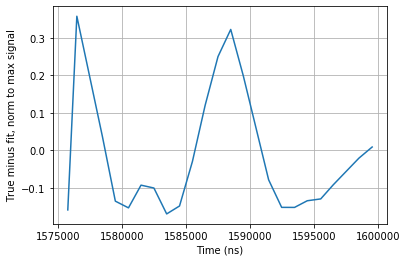

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


27000 , 27000
R2 = 0.9253807851342968
E  = 395383.00526894064


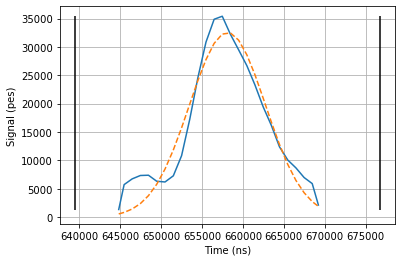

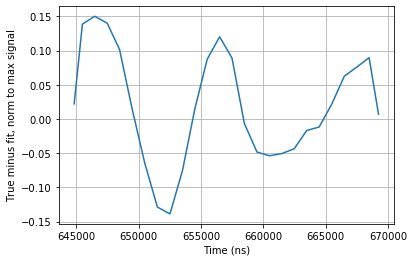

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


28000 , 28000
29000 , 29000
R2 = 0.9445346187493587
E  = 625013.0492043361


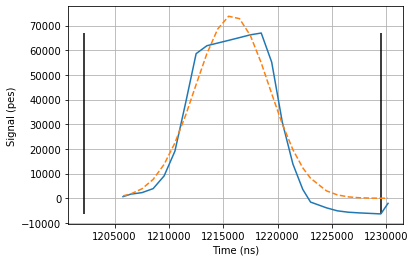

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9735068656609283
E  = 211664.74617830844


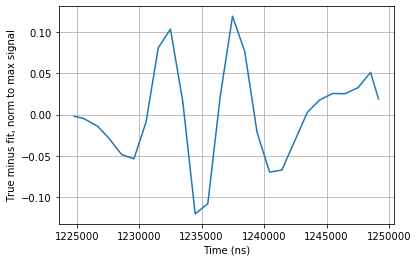

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.7943084200165236
E  = 203577.4582140126


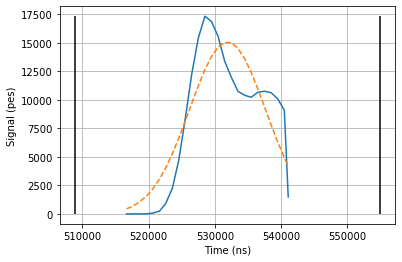

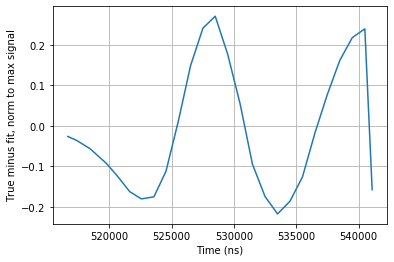

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


30000 , 30000
R2 = 0.9070461032706579
E  = 200703.81290787514


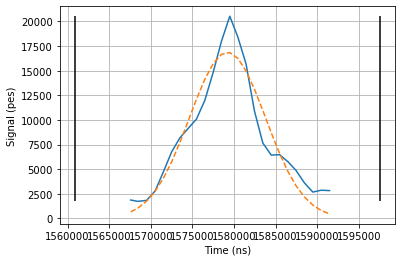

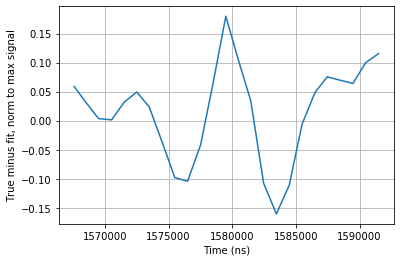

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8098927691498671
E  = 236033.57713781172


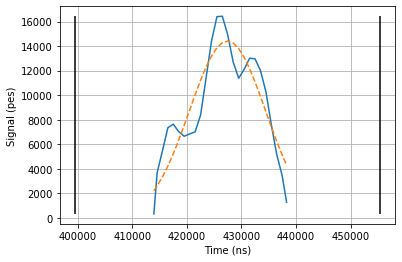

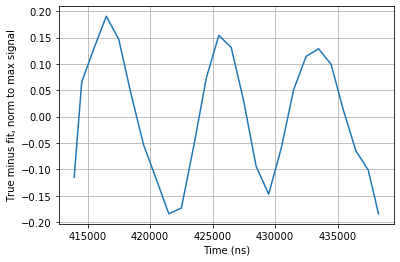

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


31000 , 31000
R2 = 0.9250334648957506
E  = 263340.59212492564


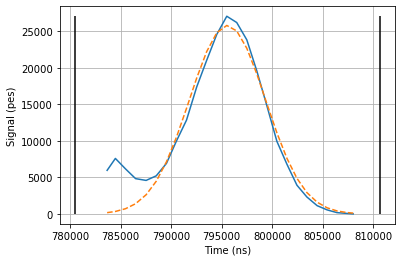

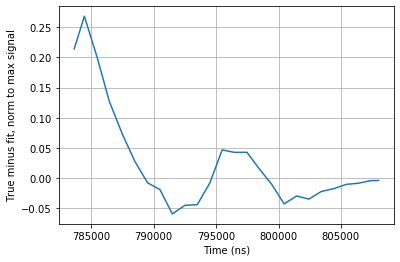

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


32000 , 32000
33000 , 33000


In [78]:
# Check quality of Gaussian fit
# Plot the waveform
all_R2 = []

shown = 0
showmax = 20
cut = 0

for i_evt in range(len(events_window_Zgauss)):    
    if i_evt % 1000 == 0:
        print(i_evt, ',', len(all_R2))
        
    #i_evt = 0 # 7082 # 0

    try:

        xdata, ydata = events_times[i_evt], events_sumwf[i_evt]
        mean0, _ = weighted_avg_and_std(xdata, ydata)
        amp0 = np.max(ydata)

        # Get the stdev guess from the less edge dependent FWHM
        above_half_max = ydata > amp0 / 2
        start = np.argmax(above_half_max)
        end = len(above_half_max)-np.argmax(above_half_max[::-1])-1
        FWHM = xdata[end] - xdata[start]
        sigma0 = FWHM / (2*np.sqrt(2*np.log(2)))
        var0 = sigma0**2
        C0 = 0

        popt,  pcov  = curve_fit(gauss2, xdata, ydata, p0 = (amp0, mean0, var0))
        amp, mean, var = popt

        stdev = var**0.5
        Wgauss = stdev
        Zgauss = exp_dt(stdev/1000)

        fitcurve = gauss2(xdata, *popt)


        residuals = ydata - gauss2(xdata, *popt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((ydata-np.mean(ydata))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
    except:
        r_squared = 0
        
    all_R2.append(r_squared)
    
    if ((0.99-cut) < r_squared < (1-cut) and shown < showmax and cut < 1) or events_energy[i_evt] > 200000:
        
        shown += 1
        
        cut += 0.01
        print('R2 =', r_squared)
        print('E  =', events_energy[i_evt])
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        ymin = min(events_sumwf[i_evt])
        ymax = max(events_sumwf[i_evt])
        plt.vlines(mean - 4 * stdev, ymin, ymax)
        plt.vlines(mean + 4 * stdev, ymin, ymax)
        plt.plot(events_times[i_evt], events_sumwf[i_evt])
        plt.plot(events_times[i_evt], fitcurve, '--')
        plt.grid(True)
        plt.show()

        plt.xlabel('Time (ns)')
        plt.ylabel('True minus fit, norm to max signal')
        plt.plot(events_times[i_evt], (events_sumwf[i_evt] - fitcurve)/amp0)
        plt.grid(True)
        plt.show()
        
        

all_R2 = np.array(all_R2)

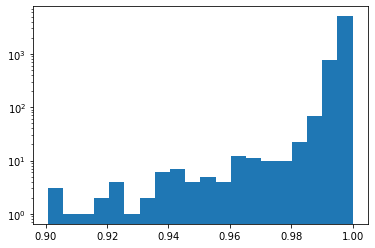

In [62]:
plt.hist(all_R2[Emask & (all_R2 > 0.9)], bins = 20)
plt.yscale('log')
plt.show()

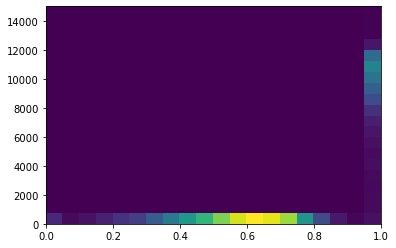

In [67]:
plt.hist2d(all_R2, events_energy, bins = 20, range=((0,1),(0, Ecut[1])))
plt.show()

In [125]:
Erange_guess = (1500, 15000)
noise_bound = 100
r2mask = (all_R2 > 0.9)
Emask2 = (events_energy > Erange_guess[0]) & (events_energy < Erange_guess[1])
r2noisemask = r2mask & (events_energy > noise_bound)
selmask = r2mask & Emask2
print('R2 sel =', round(100*sum(r2mask)/len(r2mask),1))
print('Full sel =', round(100*sum(selmask)/len(selmask),1))

R2 sel = 23.1
Full sel = 17.9


In [142]:
len(events_energy[r2noisemask & (events_energy > Erange_guess[1])]) / len(events_energy[r2noisemask])

0.19976964422830817

In [140]:
for i in range(100):
    lower = (100. - i) / 2
    upper = lower + i
    print(i, '% =',lower,'to', upper,'=', np.percentile(events_energy[r2noisemask], lower), ',', np.percentile(events_energy[r2noisemask], upper))

0 % = 50.0 to 50.0 = 10502.0649639726 , 10502.0649639726
1 % = 49.5 to 50.5 = 10478.765369894067 , 10528.328752923077
2 % = 49.0 to 51.0 = 10454.015390348733 , 10548.871553311774
3 % = 48.5 to 51.5 = 10415.777813814959 , 10573.276202264737
4 % = 48.0 to 52.0 = 10397.080261899979 , 10610.196685034683
5 % = 47.5 to 52.5 = 10371.758586342177 , 10637.759298578407
6 % = 47.0 to 53.0 = 10339.890050168802 , 10660.290787613214
7 % = 46.5 to 53.5 = 10308.25326987717 , 10686.322990529095
8 % = 46.0 to 54.0 = 10285.049969965861 , 10709.739518535775
9 % = 45.5 to 54.5 = 10251.814601688759 , 10735.939186524338
10 % = 45.0 to 55.0 = 10224.31561922142 , 10758.407845006863
11 % = 44.5 to 55.5 = 10200.294655681071 , 10778.702397975274
12 % = 44.0 to 56.0 = 10174.31673276257 , 10809.87362346059
13 % = 43.5 to 56.5 = 10150.055710852224 , 10831.20116357231
14 % = 43.0 to 57.0 = 10117.2463960174 , 10850.938672545313
15 % = 42.5 to 57.5 = 10094.255392126572 , 10872.558168738531
16 % = 42.0 to 58.0 = 10065.2

GOT LSIGMA
GOT SIGMA
GOT RSIGMA


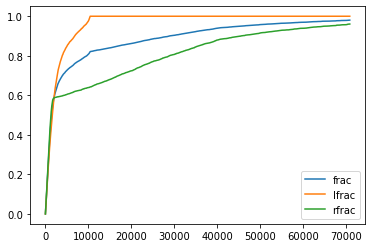

Med, lstdev, rstdev = 10502.0649639726 , 2623.1048008277653 , 15313.260458886414
Fraction estimator = 3473.8414929881214 vs std of 23607.943207449887
Four sigma sym energy range = -3393.301007979886 , 24397.430935925084
Four sigma R/L energy range = 9.645760661538588 , 71755.10679951825
Two sigma R/L energy range  = 5255.855362317069 , 41128.58588174543
R/L dble qrt energy range   = 940.8682541858325 , 20724.63107773808
Original "by eye" range     = 1500 , 15000
Selfmask signal frequency = 18.4


In [151]:
sigma_frac = 0.6827
std = np.std(events_energy[r2noisemask])
med = np.median(events_energy[r2noisemask])
ns = np.linspace(0, 3, 1000)
fracs = []
lfracs = []
rfracs = []

std_est = -1
lstd_est = -1
rstd_est = -1

left_total = np.sum(r2noisemask & (events_energy < med))
right_total = np.sum(r2noisemask & (events_energy >= med))

rrq = (np.percentile(events_energy[r2noisemask], 82) - med) # lradius, quartile. Go to double IQR
lrq = 2*(med - np.percentile(events_energy[r2noisemask], 8)) # rradius, quartile. Go to double IQR

for n in ns:
    # print()
    frac = np.sum( np.abs(events_energy[r2noisemask] - med)/std < n ) / len(events_energy[r2noisemask])
    lfrac = np.sum( np.abs(events_energy[r2noisemask & (events_energy < med)]-med)/std < n ) / left_total
    rfrac = np.sum( np.abs(events_energy[r2noisemask & (events_energy >= med)]-med)/std < n ) / right_total
    fracs.append(frac)
    lfracs.append(lfrac)
    rfracs.append(rfrac)
    if frac > sigma_frac and std_est == -1:
        std_est = n * std
        print('GOT SIGMA')
    if rfrac > sigma_frac and rstd_est == -1:
        rstd_est = n * std
        print('GOT RSIGMA')
    if lfrac > sigma_frac and lstd_est == -1:
        lstd_est = n * std
        print('GOT LSIGMA')

    # print('RFrac <', round(n,1), '=', rfrac)
    # print('LFrac <', round(n,1), '=', lfrac)
    # print('SFrac <', round(n,1), '=', frac)

plt.plot(ns * std, fracs, label = 'frac')
plt.plot(ns * std, lfracs, label = 'lfrac')
plt.plot(ns * std, rfracs, label = 'rfrac')
plt.legend()
plt.show()
print('Med, lstdev, rstdev =', med, ',', lstd_est, ',', rstd_est)
print('Fraction estimator =', std_est, 'vs std of', std)
print('Four sigma sym energy range =', med - 4*std_est, ',', med + 4*std_est)
print('Four sigma R/L energy range =', med - 4*lstd_est, ',', med + 4*rstd_est)
print('Two sigma R/L energy range  =', med - 2*lstd_est, ',', med + 2*rstd_est)
print('R/L dble qrt energy range   =', med - lrq, ',', med + rrq)
print('Original "by eye" range     =', Erange_guess[0], ',', Erange_guess[1])
selfmask = r2noisemask & (events_energy > med-lrq) & (events_energy < med+rrq) & (all_Zgauss > 0)
print('Selfmask signal frequency =', round(100*np.sum(selfmask) / len(selfmask),1))

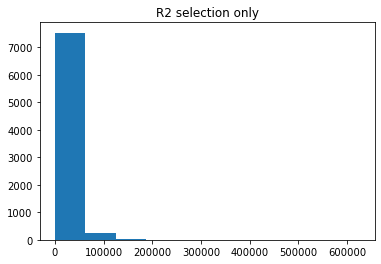

Fraction within energy cut = 0.7724955391282182


In [152]:
plt.hist(events_energy[r2mask])
plt.title('R2 selection only')
plt.show()

plt.hist(events_energy[r2mask & (events_energy < noise_bound)])
plt.title('R2 selection only, noise')
plt.show()

plt.hist(events_energy[selmask])
plt.title('R2 and energy selection, by hand')
plt.show()

plt.hist(events_energy[selfmask])
plt.title('R2 and energy self selection')
plt.show()

print('Fraction within energy cut =', len(events_energy[selmask]) / len(events_energy[r2mask]))

## Self cut spatial uniformity

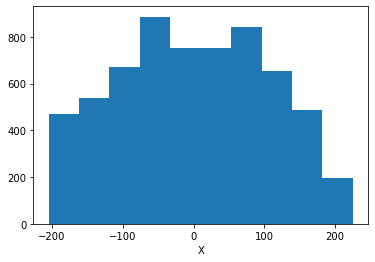

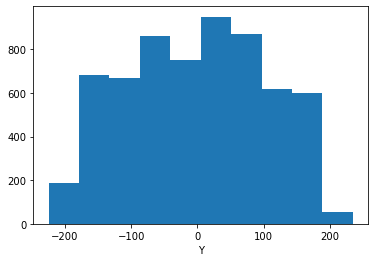

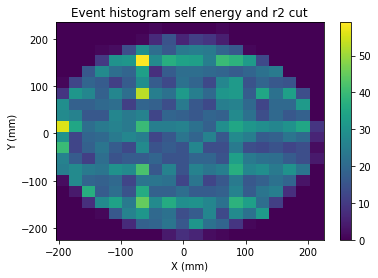

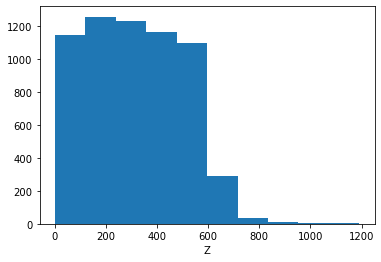

In [153]:
plt.hist(all_Xs[selfmask])
plt.xlabel('X')
plt.show()

plt.hist(all_Ys[selfmask])
plt.xlabel('Y')
plt.show()

hxy = plt.hist2d(all_Xs[selfmask], all_Ys[selfmask], bins = 20)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram self energy and r2 cut')
plt.colorbar(hxy[3])
plt.show()

plt.hist(all_Zgauss[selfmask])
plt.xlabel('Z')
plt.show()

plt.hist(all_Zgauss[selfmask], range=(0, 510))
plt.xlabel('Z < 510')
plt.show()

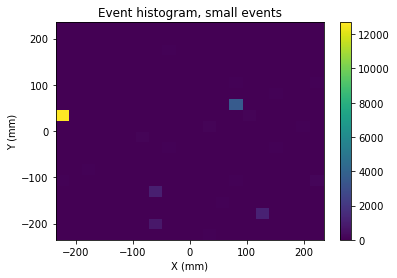

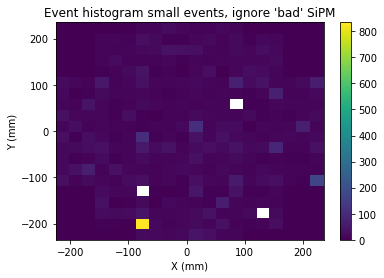

In [157]:
nobadsipm = (all_Xs != -235) & (all_Ys != 45)
smallevents = events_energy < 600

hxy = plt.hist2d(all_Xs[smallevents], all_Ys[smallevents], bins = 20)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram, small events')
plt.colorbar(hxy[3])
plt.show()

hxy = plt.hist2d(all_Xs[smallevents & nobadsipm], all_Ys[smallevents & nobadsipm], bins = 20, cmax = 1000)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram small events, ignore \'bad\' SiPM')
plt.colorbar(hxy[3])
plt.show()